In [20]:
!pip install -U https://github.com/PythonOT/POT/archive/master.zip # with --user for user install (no root)
!pip install pykeops
!pip install geomloss
!pip install muon
!pip install scanpy
!pip install -i https://test.pypi.org/simple/ "scikit-misc==0.2.0rc1"
!pip install numpy==1.26.4

  Using cached https://github.com/PythonOT/POT/archive/master.zip
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for POT: filename=pot-0.9.7.dev0-cp311-cp311-macosx_15_0_arm64.whl size=468699 sha256=520addbeb5395f39f8cd9c26b291f734565aead564f64b6609c99f856c5c47c1
  Stored in directory: /private/var/folders/b7/md0dj4pn73bd0tyht9p6x0cw0000gn/T/pip-ephem-wheel-cache-ppt76xn8/wheels/fc/b3/69/deb9c12f26c4c311bb43fab28b37c7a1faa3c089b07eea1ceb
Successfully built POT
  Attempting uninstall: POT
    Found existing installation: POT 0.9.6.post1
    Uninstalling POT-0.9.6.post1:
      Successfully uninstalled POT-0.9.6.post1
^Cpt/homebrew/Cellar/python@3.11/3.11.13_1/Frameworks/Python.framework/Versions/3.11/lib/python3.11/contextlib.py", line 586, in __exit__

  File "/opt/homebrew/Cellar/python@3.11/3.11.13_1/Frameworks/Python.framework/Versions/3.11/lib/python3.11/contextlib.py", line 144, 

In [21]:
import sys
import matplotlib.pyplot as plt
import importlib
import os
import importlib
from torch.optim.lr_scheduler import ReduceLROnPlateau
from sklearn.preprocessing import KernelCenterer
import numpy as np
import torch
import torch.optim as optim
from sklearn.decomposition import KernelPCA
from geomloss import SamplesLoss
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.decomposition import KernelPCA
import numpy as np
from scipy.spatial.distance import cdist
import random
import numpy as np
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import dijkstra
from sklearn.neighbors import kneighbors_graph
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from scipy.spatial.distance import cdist
import muon as mu
import numpy as np
import anndata as ad
import scanpy as sc
# import the main pieces

import Grotia_utils_re
importlib.reload(Grotia_utils_re)
from Grotia_utils_re import (
    AlignmentConfig,
    GridConfig,
    run_alignment,
    run_alignment_grid,
    compute_centered_rbf_kernel,build_knn_distance_matrix,
    build_knn_distance_matrix
)
import numpy as np
import pandas as pd

def summarize_results(results):
    """
    Convert the results dict from run_alignment_grid into a pandas DataFrame,
    then return three ranked views: by accuracy, by final_loss, and by FOSCTTM.
    """
    rows = []
    for (p, k, lambda_topo, lambda_reg, reach), res in results.items():
        metrics = res.get("metrics", {})
        rows.append({
            "p": p,
            "k": k,
            "lambda_topo": lambda_topo,
            "lambda_reg": lambda_reg,
            "reach": reach,
            "final_loss": res.get("final_loss", np.nan),
            "accuracy": metrics.get("accuracy", np.nan),
            "foscttm": metrics.get("foscttm", np.nan),
        })

    df = pd.DataFrame(rows)

    # Sortings
    by_acc = df.sort_values("accuracy", ascending=False).reset_index(drop=True)
    by_loss = df.sort_values("final_loss", ascending=True).reset_index(drop=True)
    by_fos = df.sort_values("foscttm", ascending=True).reset_index(drop=True)

    return df, by_acc, by_loss, by_fos





In [ ]:
import numpy as np
import pandas as pd

def summarize_results(results):
    """
    Convert the results dict from run_alignment_grid into a pandas DataFrame,
    then return three ranked views: by accuracy, by final_loss, and by FOSCTTM.
    """
    rows = []
    for (p, k, lambda_topo, lambda_reg, reach), res in results.items():
        metrics = res.get("metrics", {})
        rows.append({
            "p": p,
            "k": k,
            "lambda_topo": lambda_topo,
            "lambda_reg": lambda_reg,
            "reach": reach,
            "final_loss": res.get("final_loss", np.nan),
            "accuracy": metrics.get("accuracy", np.nan),
            "foscttm": metrics.get("foscttm", np.nan),
        })

    df = pd.DataFrame(rows)

    # Sortings
    by_acc = df.sort_values("accuracy", ascending=False).reset_index(drop=True)
    by_loss = df.sort_values("final_loss", ascending=True).reset_index(drop=True)
    by_fos = df.sort_values("foscttm", ascending=True).reset_index(drop=True)

    return df, by_acc, by_loss, by_fos


: 

: 

: 

: 

: 

: 

: 

: 

: 

# sc_gem

In [ ]:
from sklearn.preprocessing import normalize
    # use_rkhs_weights=False,     # True => geodesics sum RKHS distances; False => hop counts
    # normalize=True,
X =np.genfromtxt("/Users/aaaaaaaron/Desktop/GROTIA/Cheow_expression.csv", delimiter=",")
X_normalized = normalize(X, norm='l2')
y=np.genfromtxt("/Users/aaaaaaaron/Desktop/GROTIA/Cheow_methylation.csv", delimiter=",")
y_normalized = normalize(y, norm='l2')

cellTypes_X=np.loadtxt("/Users/aaaaaaaron/Desktop/GROTIA/scGEM_typeExpression.txt")
cellTypes_y=np.loadtxt("/Users/aaaaaaaron/Desktop/GROTIA/scGEM_typeMethylation.txt")
import torch
device_str = "cuda" if torch.cuda.is_available() else "cpu"
res_x = compute_centered_rbf_kernel(
    X_normalized
)

res_y = compute_centered_rbf_kernel(
  y_normalized
)



# Grid search example
grid = GridConfig(
    p_values=[5],
    k_values=[5],
    lambda_topo_values=[1,1e-1,1e-2,1e-3],
    lambda_reg_values=[1e-3,1e-4,1e-5,1e-6,1e-7,1e-8],
    reach_values=[0.1,1.0,5.0],
    iterations=8000,
    lr=1e-3,
    patience=10,
    print_every=500,
    dtype=torch.float64,
    seed=50,
    save_path="alignment_tuning_results.pkl",
)

results = run_alignment_grid(
   res_x['K_centered'], res_y['K_centered'],
     X_features= res_x['K_original'],
    Y_features= res_y['K_original'],
    labels_X=cellTypes_X,
    labels_Y=cellTypes_y,
    grid=grid,
    device=device_str
)

False
True
False
True

>>> Hyperparams: p=5, k=5, lambda_topo=1, lambda_reg=0.001, reach=0.1
[Iter     1] total=0.071787 | OT=0.010443 | Ortho=0.000000 | Graph=61.343770 | lr=1.00e-03 | Acc=0.4689
[Iter   500] total=0.065578 | OT=0.008901 | Ortho=0.000103 | Graph=56.573907 | lr=2.50e-04 | Acc=0.5254
[Iter  1000] total=0.055673 | OT=0.007042 | Ortho=0.000082 | Graph=48.549708 | lr=2.50e-04 | Acc=0.6610
[Iter  1500] total=0.046282 | OT=0.005683 | Ortho=0.000062 | Graph=40.538329 | lr=2.50e-04 | Acc=0.6271
[Iter  2000] total=0.039110 | OT=0.004377 | Ortho=0.000047 | Graph=34.685260 | lr=2.50e-04 | Acc=0.6158
[Iter  2500] total=0.033574 | OT=0.003517 | Ortho=0.000036 | Graph=30.021697 | lr=2.50e-04 | Acc=0.5537
[Iter  3000] total=0.028719 | OT=0.002814 | Ortho=0.000028 | Graph=25.876562 | lr=2.50e-04 | Acc=0.5650
[Iter  3500] total=0.024470 | OT=0.002397 | Ortho=0.000022 | Graph=22.051200 | lr=2.50e-04 | Acc=0.5706
[Iter  4000] total=0.020683 | OT=0.002088 | Ortho=0.000016 | Graph=18.57956

: 

: 

: 

: 

: 

: 

: 

: 

: 

In [ ]:
# Example usage:
full_df, rank_by_acc, rank_by_loss, rank_by_foscttm = summarize_results(results)

print("=== Ranked by accuracy (desc) ===")
print(rank_by_acc)

print("\n=== Ranked by final loss (asc) ===")
print(rank_by_loss)

print("\n=== Ranked by FOSCTTM (asc) ===")
print(rank_by_foscttm)

=== Ranked by accuracy (desc) ===
    p  k  lambda_topo    lambda_reg  reach  final_loss  accuracy   foscttm
0   5  5        0.001  1.000000e-07    0.1    0.001198  0.672316  0.210332
1   5  5        1.000  1.000000e-04    0.1    0.005963  0.632768  0.209694
2   5  5        0.100  1.000000e-04    1.0    0.004858  0.632768  0.210508
3   5  5        0.100  1.000000e-05    5.0    0.002885  0.627119  0.202113
4   5  5        0.001  1.000000e-06    0.1    0.001255  0.627119  0.209071
.. .. ..          ...           ...    ...         ...       ...       ...
67  5  5        0.010  1.000000e-03    0.1    0.004954  0.435028  0.257573
68  5  5        0.010  1.000000e-03    1.0    0.006347  0.423729  0.251540
69  5  5        0.010  1.000000e-03    5.0    0.004842  0.361582  0.249529
70  5  5        0.001  1.000000e-03    5.0    0.003329  0.310734  0.424335
71  5  5        0.001  1.000000e-03    1.0    0.002504  0.214689  0.433368

[72 rows x 8 columns]

=== Ranked by final loss (asc) ===
    p  

: 

: 

: 

: 

: 

: 

: 

: 

: 

# **Unbalance** Cell Type

[ATAC] Keeping 207180/207202 peaks (removed 22 all-zero peaks).


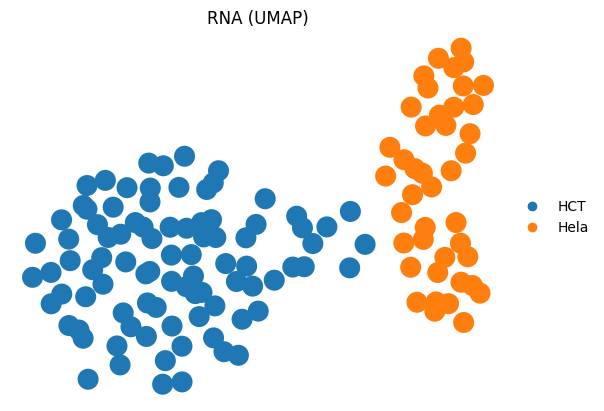

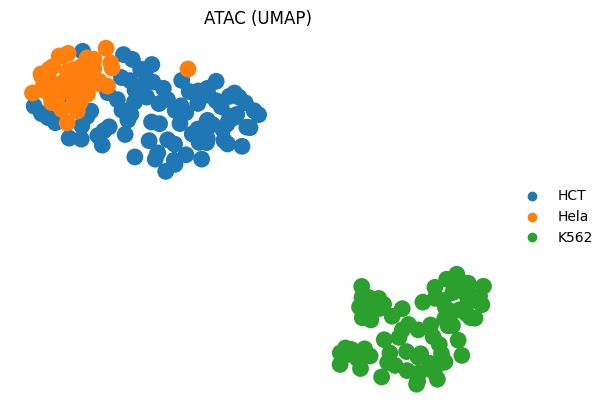

Done. RNA: (131, 4516) | ATAC: (205, 207180)


: 

: 

: 

: 

: 

: 

: 

: 

: 

In [ ]:
# !pip install scanpy anndata muon --quiet

import scanpy as sc
import muon as mu
import warnings
import numpy as np
import scanpy as sc
import muon as mu

path = "/Users/aaaaaaaron/Downloads/data_repro 2/cell_lines_2.h5mu.gz"   # or .h5mz

# Try reading directly with muon (it can handle .h5mu and .h5mz)
mdata= mu.read_h5mu(path)

# mdata = mu.read(PATH)  # <- uncomment if you haven't loaded it yet

# ---------------- RNA ----------------
# 1) Preserve raw RNA counts in a layer
mdata.mod["rna"].layers["counts"] = mdata.mod["rna"].X.copy()

# 2) Log-normalize RNA counts
sc.pp.normalize_total(mdata.mod["rna"], target_sum=1e4)
sc.pp.log1p(mdata.mod["rna"])

# 3) HVGs from both raw and normalized, then take the union
raw_hvg = sc.pp.highly_variable_genes(
    mdata.mod["rna"], layer="counts", n_top_genes=3000, subset=False,
    inplace=False, flavor="seurat_v3"
)["highly_variable"].values

norm_hvg = sc.pp.highly_variable_genes(
    mdata.mod["rna"], n_top_genes=3000, subset=False, inplace=False
)["highly_variable"].values

hvg_union = np.logical_or(raw_hvg, norm_hvg)  # <-- fixed
mdata.mod["rna"] = mdata.mod["rna"][:, hvg_union].copy()

# 4) PCA on RNA (selected genes)
sc.tl.pca(mdata.mod["rna"], n_comps=50, zero_center=None)

# ---------------- ATAC ----------------
# 5) Remove peaks that are zero across all cells to avoid TF–IDF / 0
atac = mdata.mod["atac"]
nonempty = np.ravel(atac.X.sum(axis=0)) > 0
kept, total = int(nonempty.sum()), int(nonempty.size)
print(f"[ATAC] Keeping {kept}/{total} peaks (removed {total-kept} all-zero peaks).")
atac = atac[:, nonempty].copy()
mdata.mod["atac"] = atac

# 6) TF–IDF (log TF and log IDF), then PCA
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=RuntimeWarning, message="divide by zero encountered in divide")
    mu.atac.pp.tfidf(mdata.mod["atac"], log_tf=True, log_idf=True)

sc.tl.pca(mdata.mod["atac"], n_comps=50, zero_center=None)

# ---------------- UMAPs ----------------
# 7) Neighbors + UMAP for each modality
sc.pp.neighbors(mdata.mod["rna"],  n_neighbors=15, n_pcs=50, metric="euclidean")
sc.tl.umap(mdata.mod["rna"])

sc.pp.neighbors(mdata.mod["atac"], n_neighbors=15, n_pcs=50, metric="euclidean")
sc.tl.umap(mdata.mod["atac"])

# 8) Plot UMAPs (color by celltype if present)
color_key_rna  = "celltype" if "celltype" in mdata.mod["rna"].obs.columns  else None
color_key_atac = "celltype" if "celltype" in mdata.mod["atac"].obs.columns else None

sc.pl.umap(mdata.mod["rna"],  color=color_key_rna,  title="RNA (UMAP)",  frameon=False)
sc.pl.umap(mdata.mod["atac"], color=color_key_atac, title="ATAC (UMAP)", frameon=False)

print("Done. RNA:", mdata['rna'].shape, "| ATAC:", mdata['atac'].shape)



In [ ]:
res_x = compute_centered_rbf_kernel(
    mdata.mod["rna"].obsm["X_pca"]
)

res_y = compute_centered_rbf_kernel(
    mdata.mod["atac"].obsm["X_pca"]
)



: 

: 

: 

: 

: 

: 

: 

: 

: 

In [ ]:
# Example usage:

full_df, rank_by_acc, rank_by_loss, rank_by_foscttm = summarize_results(results)

print("=== Ranked by accuracy (desc) ===")
print(rank_by_acc)

print("\n=== Ranked by final loss (asc) ===")
print(rank_by_loss)

print("\n=== Ranked by FOSCTTM (asc) ===")
print(rank_by_foscttm)

In [ ]:
# Example usage:
import torch
device_str = "cuda" if torch.cuda.is_available() else "cpu"
res_x = compute_centered_rbf_kernel(
    mdata.mod["rna"].obsm["X_pca"]
)

res_y = compute_centered_rbf_kernel(
    mdata.mod["atac"].obsm["X_pca"]
)



# Grid search example
grid = GridConfig(
    p_values=[8],
    k_values=[5],
    lambda_topo_values=[1,1e-1,1e-2,1e-3],
    lambda_reg_values=[1e-3,1e-4,1e-5,1e-6,1e-7,1e-8],
    reach_values=[0.1,1.0,5.0],
    iterations=4000,
    lr=1e-3,
    patience=10,
    print_every=500,
    dtype=torch.float64,
    seed=50,
    save_path="alignment_tuning_results.pkl",
)

results = run_alignment_grid(
   res_x['K_centered'], res_y['K_centered'],
   X_features= res_x['K_original'],
    Y_features= res_y['K_original'],
       labels_X=mdata['rna'].obs['celltype'],
    labels_Y=mdata['atac'].obs['celltype'],
    grid=grid,
    device=device_str
)
full_df, rank_by_acc, rank_by_loss, rank_by_foscttm = summarize_results(results)

print("=== Ranked by accuracy (desc) ===")
print(rank_by_acc)

print("\n=== Ranked by final loss (asc) ===")
print(rank_by_loss)

print("\n=== Ranked by FOSCTTM (asc) ===")
print(rank_by_foscttm)


>>> Hyperparams: p=8, k=5, lambda_topo=1, lambda_reg=0.001, reach=0.1
[Iter     1] total=0.136030 | OT=0.017066 | Ortho=0.000000 | Graph=118.964130 | lr=1.00e-03 | Acc=0.8244
[Iter   500] total=0.061942 | OT=0.014499 | Ortho=0.000070 | Graph=47.373314 | lr=5.00e-04 | Acc=0.8702
[Iter  1000] total=0.046124 | OT=0.012862 | Ortho=0.000031 | Graph=33.230731 | lr=5.00e-04 | Acc=0.9466
[Iter  1500] total=0.039356 | OT=0.009510 | Ortho=0.000023 | Graph=29.823490 | lr=5.00e-04 | Acc=0.7481
[Iter  2000] total=0.035487 | OT=0.008290 | Ortho=0.000024 | Graph=27.172752 | lr=5.00e-04 | Acc=0.7328
[Iter  2500] total=0.030570 | OT=0.006182 | Ortho=0.000016 | Graph=24.371737 | lr=5.00e-04 | Acc=0.7557
[Iter  3000] total=0.026659 | OT=0.004737 | Ortho=0.000012 | Graph=21.909716 | lr=5.00e-04 | Acc=0.7099
[Iter  3500] total=0.023824 | OT=0.004037 | Ortho=0.000010 | Graph=19.776294 | lr=5.00e-04 | Acc=0.7176
Early stopping at iter=3906 (best@3896 total=0.021983).

>>> Hyperparams: p=8, k=5, lambda_topo=

In [22]:
# Example usage:
import torch
device_str = "cuda" if torch.cuda.is_available() else "cpu"
res_x = compute_centered_rbf_kernel(
    mdata.mod["rna"].obsm["X_pca"]
)

res_y = compute_centered_rbf_kernel(
    mdata.mod["atac"].obsm["X_pca"]
)



# Grid search example
grid = GridConfig(
    p_values=[8],
    k_values=[5],
    lambda_topo_values=[1,1e-1,1e-2,1e-3],
    lambda_reg_values=[1e-3,1e-4,1e-5,1e-6,1e-7,1e-8],
    reach_values=[0.1,1.0,5.0],
    iterations=4000,
    lr=1e-3,
    patience=10,
    print_every=500,
    dtype=torch.float64,
    seed=50,
    save_path="alignment_tuning_results.pkl",
)

results = run_alignment_grid(
   res_x['K_centered'], res_y['K_centered'],
   X_features= res_x['Ori_Feature'],
    Y_features= res_y['Ori_Feature'],
       labels_X=mdata['rna'].obs['celltype'],
    labels_Y=mdata['atac'].obs['celltype'],
    grid=grid,
    device=device_str
)
full_df, rank_by_acc, rank_by_loss, rank_by_foscttm = summarize_results(results)

print("=== Ranked by accuracy (desc) ===")
print(rank_by_acc)

print("\n=== Ranked by final loss (asc) ===")
print(rank_by_loss)

print("\n=== Ranked by FOSCTTM (asc) ===")
print(rank_by_foscttm)


>>> Hyperparams: p=8, k=5, lambda_topo=1, lambda_reg=0.001, reach=0.1
[Iter     1] total=0.114633 | OT=0.017066 | Ortho=0.000000 | Graph=97.566953 | lr=1.00e-03 | Acc=0.8244
[Iter   500] total=0.104197 | OT=0.016293 | Ortho=0.000801 | Graph=87.103664 | lr=2.50e-04 | Acc=0.8321
[Iter  1000] total=0.052138 | OT=0.013632 | Ortho=0.000045 | Graph=38.460198 | lr=2.50e-04 | Acc=0.8855
[Iter  1500] total=0.044841 | OT=0.012522 | Ortho=0.000032 | Graph=32.286352 | lr=2.50e-04 | Acc=0.8931
[Iter  2000] total=0.038856 | OT=0.012531 | Ortho=0.000021 | Graph=26.303371 | lr=2.50e-04 | Acc=0.8931
[Iter  2500] total=0.033086 | OT=0.009317 | Ortho=0.000017 | Graph=23.751933 | lr=2.50e-04 | Acc=0.8931
[Iter  3000] total=0.029017 | OT=0.007954 | Ortho=0.000012 | Graph=21.050953 | lr=2.50e-04 | Acc=0.9237
[Iter  3500] total=0.026371 | OT=0.007146 | Ortho=0.000010 | Graph=19.214397 | lr=2.50e-04 | Acc=0.9313
[Iter  4000] total=0.023942 | OT=0.006165 | Ortho=0.000009 | Graph=17.768246 | lr=2.50e-04 | Acc=

In [24]:
# Example usage:
import torch
device_str = "cuda" if torch.cuda.is_available() else "cpu"
res_x = compute_centered_rbf_kernel(
    mdata.mod["rna"].obsm["X_pca"]
)

res_y = compute_centered_rbf_kernel(
    mdata.mod["atac"].obsm["X_pca"]
)



# Grid search example
grid = GridConfig(
    p_values=[5],
    k_values=[5],
    lambda_topo_values=[1,1e-1,1e-2,1e-3],
    lambda_reg_values=[1e-3,1e-4,1e-5,1e-6,1e-7,1e-8],
    reach_values=[0.1,1.0,5.0],
    iterations=4000,
    lr=1e-3,
    patience=10,
    print_every=500,
    dtype=torch.float64,
    seed=50,
    save_path="alignment_tuning_results.pkl",
)

results = run_alignment_grid(
   res_x['K_centered'], res_y['K_centered'],
   X_features= res_x['Ori_Feature'],
    Y_features= res_y['Ori_Feature'],
       labels_X=mdata['rna'].obs['celltype'],
    labels_Y=mdata['atac'].obs['celltype'],
    grid=grid,
    device=device_str
)
full_df, rank_by_acc, rank_by_loss, rank_by_foscttm = summarize_results(results)

print("=== Ranked by accuracy (desc) ===")
print(rank_by_acc)

print("\n=== Ranked by final loss (asc) ===")
print(rank_by_loss)

print("\n=== Ranked by FOSCTTM (asc) ===")
print(rank_by_foscttm)


>>> Hyperparams: p=5, k=5, lambda_topo=1, lambda_reg=0.001, reach=0.1
[Iter     1] total=0.103656 | OT=0.016504 | Ortho=0.000000 | Graph=87.151703 | lr=1.00e-03 | Acc=0.8321
[Iter   500] total=0.042944 | OT=0.012956 | Ortho=0.000042 | Graph=29.946619 | lr=5.00e-04 | Acc=0.8702
[Iter  1000] total=0.031228 | OT=0.010549 | Ortho=0.000025 | Graph=20.653707 | lr=5.00e-04 | Acc=0.8855
[Iter  1500] total=0.021970 | OT=0.007326 | Ortho=0.000013 | Graph=14.630840 | lr=5.00e-04 | Acc=0.8397
[Iter  2000] total=0.016888 | OT=0.005161 | Ortho=0.000013 | Graph=11.714298 | lr=5.00e-04 | Acc=0.9084
[Iter  2500] total=0.014237 | OT=0.003966 | Ortho=0.000005 | Graph=10.264861 | lr=5.00e-04 | Acc=0.9084
[Iter  3000] total=0.012156 | OT=0.003017 | Ortho=0.000004 | Graph=9.133807 | lr=5.00e-04 | Acc=0.9008
[Iter  3500] total=0.010664 | OT=0.002492 | Ortho=0.000003 | Graph=8.169020 | lr=5.00e-04 | Acc=0.8473
Early stopping at iter=3712 (best@3702 total=0.010201).

>>> Hyperparams: p=5, k=5, lambda_topo=1, 

In [26]:
# Example usage:
import torch
device_str = "cuda" if torch.cuda.is_available() else "cpu"
res_x = compute_centered_rbf_kernel(
    mdata.mod["rna"].obsm["X_pca"]
)

res_y = compute_centered_rbf_kernel(
    mdata.mod["atac"].obsm["X_pca"]
)



# Grid search example
grid = GridConfig(
    p_values=[5],
    k_values=[5],
    lambda_topo_values=[1,1e-1,1e-2,1e-3],
    lambda_reg_values=[1e-3,1e-4,1e-5,1e-6,1e-7,1e-8],
    reach_values=[0.1,1.0,5.0],
    iterations=4000,
    lr=1e-3,
    patience=10,
    print_every=500,
    dtype=torch.float64,
    seed=50,
    save_path="alignment_tuning_results.pkl",
)

results = run_alignment_grid(
   res_x['K_centered'], res_y['K_centered'],
   X_features= res_x['K_original'],
    Y_features= res_y['K_original'],
       labels_X=mdata['rna'].obs['celltype'],
    labels_Y=mdata['atac'].obs['celltype'],
    grid=grid,
    device=device_str
)
full_df, rank_by_acc, rank_by_loss, rank_by_foscttm = summarize_results(results)

print("=== Ranked by accuracy (desc) ===")
print(rank_by_acc)

print("\n=== Ranked by final loss (asc) ===")
print(rank_by_loss)

print("\n=== Ranked by FOSCTTM (asc) ===")
print(rank_by_foscttm)


>>> Hyperparams: p=5, k=5, lambda_topo=1, lambda_reg=0.001, reach=0.1
[Iter     1] total=0.121988 | OT=0.016504 | Ortho=0.000000 | Graph=105.483970 | lr=1.00e-03 | Acc=0.8321
[Iter   500] total=0.047333 | OT=0.012861 | Ortho=0.000060 | Graph=34.411757 | lr=5.00e-04 | Acc=0.8855
[Iter  1000] total=0.030409 | OT=0.010460 | Ortho=0.000022 | Graph=19.927722 | lr=5.00e-04 | Acc=0.8779
[Iter  1500] total=0.024244 | OT=0.007238 | Ortho=0.000013 | Graph=16.992302 | lr=5.00e-04 | Acc=0.8092
[Iter  2000] total=0.021527 | OT=0.006442 | Ortho=0.000011 | Graph=15.074067 | lr=5.00e-04 | Acc=0.8168
[Iter  2500] total=0.018724 | OT=0.005312 | Ortho=0.000010 | Graph=13.402551 | lr=5.00e-04 | Acc=0.7863
[Iter  3000] total=0.014764 | OT=0.002873 | Ortho=0.000007 | Graph=11.884001 | lr=5.00e-04 | Acc=0.8550
[Iter  3500] total=0.012873 | OT=0.002280 | Ortho=0.000005 | Graph=10.586986 | lr=5.00e-04 | Acc=0.8626
Early stopping at iter=3868 (best@3858 total=0.011889).

>>> Hyperparams: p=5, k=5, lambda_topo=

In [32]:
# Example usage:
import torch
device_str = "cuda" if torch.cuda.is_available() else "cpu"
res_x = compute_centered_rbf_kernel(
    mdata.mod["rna"].obsm["X_pca"]
)

res_y = compute_centered_rbf_kernel(
    mdata.mod["atac"].obsm["X_pca"]
)



# Grid search example
grid = GridConfig(
    p_values=[8],
    k_values=[5],
    lambda_topo_values=[1e-4],
    lambda_reg_values=[1e-3,1e-4,1e-5,1e-6,1e-7,1e-8],
    reach_values=[0.1,1.0,5.0],
    iterations=4000,
    lr=1e-3,
    patience=10,
    print_every=500,
    dtype=torch.float64,
    seed=50,
    save_path="alignment_tuning_results.pkl",
)

results = run_alignment_grid(
   res_x['K_centered'], res_y['K_centered'],
   X_features= res_x['Ori_Feature'],
    Y_features= res_y['Ori_Feature'],
       labels_X=mdata['rna'].obs['celltype'],
    labels_Y=mdata['atac'].obs['celltype'],
    grid=grid,
    device=device_str
)
full_df, rank_by_acc, rank_by_loss, rank_by_foscttm = summarize_results(results)

print("=== Ranked by accuracy (desc) ===")
print(rank_by_acc)

print("\n=== Ranked by final loss (asc) ===")
print(rank_by_loss)

print("\n=== Ranked by FOSCTTM (asc) ===")
print(rank_by_foscttm)


>>> Hyperparams: p=8, k=5, lambda_topo=0.0001, lambda_reg=0.001, reach=0.1
[Iter     1] total=0.114633 | OT=0.017066 | Ortho=0.000000 | Graph=97.566953 | lr=1.00e-03 | Acc=0.8244
[Iter   500] total=0.001823 | OT=0.000022 | Ortho=15.162039 | Graph=0.284461 | lr=1.00e-03 | Acc=0.8015
[Iter  1000] total=0.001650 | OT=0.000004 | Ortho=15.529957 | Graph=0.093502 | lr=5.00e-04 | Acc=0.8244
[Iter  1500] total=0.001616 | OT=0.000001 | Ortho=15.629987 | Graph=0.051527 | lr=5.00e-04 | Acc=0.8397
Early stopping at iter=1868 (best@1868 total=0.001607).

>>> Hyperparams: p=8, k=5, lambda_topo=0.0001, lambda_reg=0.001, reach=1.0
[Iter     1] total=0.167557 | OT=0.069991 | Ortho=0.000000 | Graph=97.566953 | lr=1.00e-03 | Acc=0.8244
[Iter   500] total=0.002029 | OT=0.000037 | Ortho=14.874419 | Graph=0.504485 | lr=1.00e-03 | Acc=0.8092
[Iter  1000] total=0.001674 | OT=0.000005 | Ortho=15.536303 | Graph=0.115452 | lr=1.00e-03 | Acc=0.8321
Early stopping at iter=1106 (best@1096 total=0.001654).

>>> Hyp

# snare

In [33]:
from sklearn.preprocessing import normalize

X = np.load("/Users/aaaaaaaron/Desktop/GROTIA/SNAREseq_rna_feat.npy")
y = np.load("/Users/aaaaaaaron/Desktop/GROTIA/SNAREseq_atac_feat.npy")
cellTypes_X = np.loadtxt("/Users/aaaaaaaron/Desktop/GROTIA/SNAREseq_rna_types.txt", dtype=str)
cellTypes_y = np.loadtxt("/Users/aaaaaaaron/Desktop/GROTIA/SNAREseq_atac_types.txt", dtype=str)

X_normalized = normalize(X, norm='l2')
y_normalized = normalize(y, norm='l2')

In [34]:
import torch
device_str = "cuda" if torch.cuda.is_available() else "cpu"
res_x = compute_centered_rbf_kernel(
    X_normalized
)

res_y = compute_centered_rbf_kernel(
  y_normalized
)


# Grid search example
grid = GridConfig(
    p_values=[8],
    k_values=[5],
    lambda_topo_values=[1,1e-1,1e-2,1e-3],
    lambda_reg_values=[1e-3,1e-4,1e-5,1e-6,1e-7,1e-8],
    reach_values=[0.1,1.0,5.0],
    iterations=4000,
    lr=1e-3,
    patience=10,
    print_every=500,
    dtype=torch.float64,
    seed=50,
    save_path="alignment_tuning_results.pkl",
)

results = run_alignment_grid(
   res_x['K_centered'], res_y['K_centered'],
   X_features= res_x['K_original'],
    Y_features= res_y['K_original'],
    labels_X=cellTypes_X,
    labels_Y=cellTypes_y,
    grid=grid,
    device=device_str
)


>>> Hyperparams: p=8, k=5, lambda_topo=1, lambda_reg=0.001, reach=0.1
[Iter     1] total=0.126560 | OT=0.011453 | Ortho=0.000000 | Graph=115.107389 | lr=1.00e-03 | Acc=0.9819
[Iter   500] total=0.125115 | OT=0.010549 | Ortho=0.000247 | Graph=114.318960 | lr=6.25e-05 | Acc=0.9847
[Iter  1000] total=0.124432 | OT=0.010422 | Ortho=0.000246 | Graph=113.764147 | lr=6.25e-05 | Acc=0.9885
[Iter  1500] total=0.123333 | OT=0.010355 | Ortho=0.000244 | Graph=112.734409 | lr=6.25e-05 | Acc=0.9895
[Iter  2000] total=0.121299 | OT=0.010295 | Ortho=0.000240 | Graph=110.765045 | lr=6.25e-05 | Acc=0.9904
[Iter  2500] total=0.117042 | OT=0.010174 | Ortho=0.000232 | Graph=106.636060 | lr=6.25e-05 | Acc=0.9895
[Iter  3000] total=0.107838 | OT=0.009861 | Ortho=0.000212 | Graph=97.765204 | lr=6.25e-05 | Acc=0.9866
[Iter  3500] total=0.095063 | OT=0.009289 | Ortho=0.000175 | Graph=85.598514 | lr=6.25e-05 | Acc=0.9876
[Iter  4000] total=0.083298 | OT=0.008709 | Ortho=0.000147 | Graph=74.441872 | lr=6.25e-05 

In [12]:
# Example usage:
full_df, rank_by_acc, rank_by_loss, rank_by_foscttm = summarize_results(results)

print("=== Ranked by accuracy (desc) ===")
print(rank_by_acc)

print("\n=== Ranked by final loss (asc) ===")
print(rank_by_loss)

print("\n=== Ranked by FOSCTTM (asc) ===")
print(rank_by_foscttm)

=== Ranked by accuracy (desc) ===
    p  k  lambda_topo    lambda_reg  reach  final_loss  accuracy   foscttm
0   8  5        0.100  1.000000e-06    0.1    0.008065  0.987584  0.154345
1   8  5        0.100  1.000000e-07    0.1    0.007908  0.987584  0.154355
2   8  5        0.100  1.000000e-08    0.1    0.007889  0.987584  0.154375
3   8  5        0.100  1.000000e-05    0.1    0.009481  0.986628  0.153955
4   8  5        1.000  1.000000e-04    5.0    0.038942  0.986628  0.150779
.. .. ..          ...           ...    ...         ...       ...       ...
67  8  5        0.010  1.000000e-03    5.0    0.028324  0.279847  0.512446
68  8  5        0.010  1.000000e-03    1.0    0.027261  0.270296  0.513803
69  8  5        0.001  1.000000e-05    0.1    0.005138  0.208214  0.545526
70  8  5        0.001  1.000000e-03    5.0    0.015964  0.190067  0.594196
71  8  5        0.001  1.000000e-03    1.0    0.015957  0.167144  0.574220

[72 rows x 8 columns]

=== Ranked by final loss (asc) ===
    p  

# Simulation-1

In [5]:
X = np.loadtxt("/Users/aaaaaaaron/Desktop/GROTIA/drive-download-20251119T201410Z-1-001/s1_mapped1.txt")
y = np.loadtxt("/Users/aaaaaaaron/Desktop/GROTIA/drive-download-20251119T201410Z-1-001//s1_mapped2.txt")
def zscore_normalization(data):
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    normalized_data = (data - mean) / std
    return normalized_data
cellTypes_X=np.loadtxt("/Users/aaaaaaaron/Desktop/GROTIA/drive-download-20251119T201410Z-1-001//s1_label1.txt")
cellTypes_y=np.loadtxt("/Users/aaaaaaaron/Desktop/GROTIA/drive-download-20251119T201410Z-1-001//s1_label2.txt")

X_normalized = zscore_normalization(X)
y_normalized = zscore_normalization(y)

In [15]:
import torch
device_str = "cuda" if torch.cuda.is_available() else "cpu"
res_x = compute_centered_rbf_kernel(
    X_normalized
)

res_y = compute_centered_rbf_kernel(
  y_normalized
)


# Grid search example
grid = GridConfig(
    p_values=[8],
    k_values=[5],
    lambda_topo_values=[1,1e-1,1e-2,1e-3],
    lambda_reg_values=[1e-3,1e-4,1e-5,1e-6,1e-7,1e-8],
    reach_values=[0.1,1.0,5.0],
    iterations=4000,
    lr=1e-3,
    patience=10,
    print_every=500,
    dtype=torch.float64,
    seed=50,
    save_path="alignment_tuning_results.pkl",
)

results = run_alignment_grid(
   res_x['K_centered'], res_y['K_centered'],
   X_features= res_x['K_original'],
    Y_features= res_y['K_original'],
    labels_X=cellTypes_X,
    labels_Y=cellTypes_y,
    grid=grid,
    device=device_str
)





False
True
False
True

>>> Hyperparams: p=8, k=5, lambda_topo=1, lambda_reg=0.001, reach=0.1
[Iter     1] total=0.038825 | OT=0.010699 | Ortho=0.000000 | Graph=28.126072 | lr=1.00e-03 | Acc=0.9567
Early stopping at iter=153 (best@153 total=0.038704).

>>> Hyperparams: p=8, k=5, lambda_topo=1, lambda_reg=0.001, reach=1.0
[Iter     1] total=0.054617 | OT=0.026491 | Ortho=0.000000 | Graph=28.126072 | lr=1.00e-03 | Acc=0.9567
Early stopping at iter=140 (best@140 total=0.054481).

>>> Hyperparams: p=8, k=5, lambda_topo=1, lambda_reg=0.001, reach=5.0
[Iter     1] total=0.055051 | OT=0.026925 | Ortho=0.000000 | Graph=28.126072 | lr=1.00e-03 | Acc=0.9567
Early stopping at iter=144 (best@144 total=0.054914).

>>> Hyperparams: p=8, k=5, lambda_topo=1, lambda_reg=0.0001, reach=0.1
[Iter     1] total=0.013512 | OT=0.010699 | Ortho=0.000000 | Graph=28.126072 | lr=1.00e-03 | Acc=0.9567
[Iter   500] total=0.013424 | OT=0.010602 | Ortho=0.000010 | Graph=28.115824 | lr=7.81e-06 | Acc=0.9633
Early stopp

In [16]:
import numpy as np
import pandas as pd

def summarize_results(results):
    """
    Convert the results dict from run_alignment_grid into a pandas DataFrame,
    then return three ranked views: by accuracy, by final_loss, and by FOSCTTM.
    """
    rows = []
    for (p, k, lambda_topo, lambda_reg, reach), res in results.items():
        metrics = res.get("metrics", {})
        rows.append({
            "p": p,
            "k": k,
            "lambda_topo": lambda_topo,
            "lambda_reg": lambda_reg,
            "reach": reach,
            "final_loss": res.get("final_loss", np.nan),
            "accuracy": metrics.get("accuracy", np.nan),
            "foscttm": metrics.get("foscttm", np.nan),
        })

    df = pd.DataFrame(rows)

    # Sortings
    by_acc = df.sort_values("accuracy", ascending=False).reset_index(drop=True)
    by_loss = df.sort_values("final_loss", ascending=True).reset_index(drop=True)
    by_fos = df.sort_values("foscttm", ascending=True).reset_index(drop=True)

    return df, by_acc, by_loss, by_fos


# Example usage:
full_df, rank_by_acc, rank_by_loss, rank_by_foscttm = summarize_results(results)

print("=== Ranked by accuracy (desc) ===")
print(rank_by_acc)

print("\n=== Ranked by final loss (asc) ===")
print(rank_by_loss)

print("\n=== Ranked by FOSCTTM (asc) ===")
print(rank_by_foscttm)


=== Ranked by accuracy (desc) ===
    p  k  lambda_topo    lambda_reg  reach  final_loss  accuracy   foscttm
0   8  5        0.001  1.000000e-08    5.0    0.002650  0.976667  0.070433
1   8  5        0.001  1.000000e-05    5.0    0.002877  0.976667  0.070406
2   8  5        0.010  1.000000e-05    1.0    0.003071  0.976667  0.070156
3   8  5        0.010  1.000000e-06    1.0    0.002512  0.976667  0.069750
4   8  5        0.010  1.000000e-06    5.0    0.002962  0.976667  0.070217
.. .. ..          ...           ...    ...         ...       ...       ...
67  8  5        0.010  1.000000e-03    0.1    0.005634  0.946667  0.097078
68  8  5        0.010  1.000000e-03    1.0    0.007362  0.943333  0.091094
69  8  5        0.001  1.000000e-03    1.0    0.005410  0.300000  0.330533
70  8  5        0.001  1.000000e-03    5.0    0.006031  0.286667  0.343967
71  8  5        0.001  1.000000e-03    0.1    0.012837  0.253333  0.337472

[72 rows x 8 columns]

=== Ranked by final loss (asc) ===
    p  

# sim-2

In [6]:
X = np.loadtxt("/Users/aaaaaaaron/Desktop/GROTIA/drive-download-20251119T201410Z-1-001/s2_mapped1.txt")
y = np.loadtxt("/Users/aaaaaaaron/Desktop/GROTIA/drive-download-20251119T201410Z-1-001/s2_mapped2.txt")
X_normalized = zscore_normalization(X)
y_normalized = zscore_normalization(y)
cellTypes_X=np.loadtxt("/Users/aaaaaaaron/Desktop/GROTIA/drive-download-20251119T201410Z-1-001/s2_label1.txt", dtype=str)
cellTypes_y=np.loadtxt("/Users/aaaaaaaron/Desktop/GROTIA/drive-download-20251119T201410Z-1-001/s2_label2.txt", dtype=str)

In [7]:
import torch
device_str = "cuda" if torch.cuda.is_available() else "cpu"
res_x = compute_centered_rbf_kernel(
    X_normalized
)

res_y = compute_centered_rbf_kernel(
  y_normalized
)


# Grid search example
grid = GridConfig(
    p_values=[8],
    k_values=[5],
    lambda_topo_values=[1,1e-1,1e-2,1e-3],
    lambda_reg_values=[1e-3,1e-4,1e-5,1e-6,1e-7,1e-8],
    reach_values=[0.1,1.0,5.0],
    iterations=4000,
    lr=1e-3,
    patience=10,
    print_every=500,
    dtype=torch.float64,
    seed=50,
    save_path="alignment_tuning_results.pkl",
)

results = run_alignment_grid(
   res_x['K_centered'], res_y['K_centered'],
   X_features= res_x['K_original'],
    Y_features= res_y['K_original'],
    labels_X=cellTypes_X,
    labels_Y=cellTypes_y,
    grid=grid,
    device=device_str
)





False
True
False
True

>>> Hyperparams: p=8, k=5, lambda_topo=1, lambda_reg=0.001, reach=0.1
[Iter     1] total=0.043733 | OT=0.002634 | Ortho=0.000000 | Graph=41.099444 | lr=1.00e-03 | Acc=0.9900
[Iter   500] total=0.042859 | OT=0.001943 | Ortho=0.000034 | Graph=40.881642 | lr=1.25e-04 | Acc=0.9900
[Iter  1000] total=0.042476 | OT=0.001859 | Ortho=0.000034 | Graph=40.582949 | lr=1.25e-04 | Acc=0.9900
[Iter  1500] total=0.041888 | OT=0.001782 | Ortho=0.000033 | Graph=40.073043 | lr=1.25e-04 | Acc=0.9900
[Iter  2000] total=0.040977 | OT=0.001718 | Ortho=0.000032 | Graph=39.227133 | lr=1.25e-04 | Acc=0.9900
[Iter  2500] total=0.039525 | OT=0.001665 | Ortho=0.000031 | Graph=37.828838 | lr=1.25e-04 | Acc=0.9900
[Iter  3000] total=0.037312 | OT=0.001603 | Ortho=0.000028 | Graph=35.680507 | lr=1.25e-04 | Acc=0.9933
[Iter  3500] total=0.034681 | OT=0.001508 | Ortho=0.000036 | Graph=33.137752 | lr=1.25e-04 | Acc=0.9933
[Iter  4000] total=0.032448 | OT=0.001399 | Ortho=0.000023 | Graph=31.02609

In [8]:
# Example usage:
full_df, rank_by_acc, rank_by_loss, rank_by_foscttm = summarize_results(results)

print("=== Ranked by accuracy (desc) ===")
print(rank_by_acc)

print("\n=== Ranked by final loss (asc) ===")
print(rank_by_loss)

print("\n=== Ranked by FOSCTTM (asc) ===")
print(rank_by_foscttm)

=== Ranked by accuracy (desc) ===
    p  k  lambda_topo    lambda_reg  reach  final_loss  accuracy   foscttm
0   8  5        1.000  1.000000e-03    0.1    0.032448  0.993333  0.006100
1   8  5        0.100  1.000000e-06    5.0    0.001993  0.993333  0.005639
2   8  5        0.100  1.000000e-07    5.0    0.001956  0.993333  0.005644
3   8  5        0.100  1.000000e-08    1.0    0.001942  0.993333  0.005667
4   8  5        0.100  1.000000e-08    5.0    0.001952  0.993333  0.005644
.. .. ..          ...           ...    ...         ...       ...       ...
67  8  5        0.100  1.000000e-03    5.0    0.013129  0.980000  0.007050
68  8  5        0.100  1.000000e-03    1.0    0.012961  0.980000  0.007089
69  8  5        0.100  1.000000e-03    0.1    0.010066  0.980000  0.007439
70  8  5        0.001  1.000000e-03    0.1    0.012416  0.980000  0.009283
71  8  5        0.010  1.000000e-03    0.1    0.012649  0.980000  0.007172

[72 rows x 8 columns]

=== Ranked by final loss (asc) ===
    p  

# sim-3

In [9]:
X = np.loadtxt("/Users/aaaaaaaron/Desktop/GROTIA/drive-download-20251119T201410Z-1-001/s3_mapped1.txt")
y = np.loadtxt("/Users/aaaaaaaron/Desktop/GROTIA/drive-download-20251119T201410Z-1-001/s3_mapped2.txt")
X_normalized = zscore_normalization(X)
y_normalized = zscore_normalization(y)
cellTypes_X=np.loadtxt("/Users/aaaaaaaron/Desktop/GROTIA/drive-download-20251119T201410Z-1-001/s3_label1.txt", dtype=str)
cellTypes_y=np.loadtxt("/Users/aaaaaaaron/Desktop/GROTIA/drive-download-20251119T201410Z-1-001/s3_label2.txt", dtype=str)

In [10]:
import torch
device_str = "cuda" if torch.cuda.is_available() else "cpu"
res_x = compute_centered_rbf_kernel(
    X_normalized
)

res_y = compute_centered_rbf_kernel(
  y_normalized
)


# Grid search example
grid = GridConfig(
    p_values=[8],
    k_values=[5],
    lambda_topo_values=[1,1e-1,1e-2,1e-3],
    lambda_reg_values=[1e-3,1e-4,1e-5,1e-6,1e-7,1e-8],
    reach_values=[0.1,1.0,5.0],
    iterations=4000,
    lr=1e-3,
    patience=10,
    print_every=500,
    dtype=torch.float64,
    seed=50,
    save_path="alignment_tuning_results.pkl",
)

results = run_alignment_grid(
   res_x['K_centered'], res_y['K_centered'],
   X_features= res_x['K_original'],
    Y_features= res_y['K_original'],
    labels_X=cellTypes_X,
    labels_Y=cellTypes_y,
    grid=grid,
    device=device_str
)

False
True
False
True

>>> Hyperparams: p=8, k=5, lambda_topo=1, lambda_reg=0.001, reach=0.1
[Iter     1] total=0.036646 | OT=0.013154 | Ortho=0.000000 | Graph=23.492864 | lr=1.00e-03 | Acc=0.9300
[Iter   500] total=0.034908 | OT=0.011428 | Ortho=0.000017 | Graph=23.464078 | lr=1.25e-04 | Acc=0.9367
[Iter  1000] total=0.034169 | OT=0.010696 | Ortho=0.000016 | Graph=23.456555 | lr=1.25e-04 | Acc=0.9433
[Iter  1500] total=0.033774 | OT=0.010314 | Ortho=0.000014 | Graph=23.444893 | lr=1.25e-04 | Acc=0.9433
[Iter  2000] total=0.033432 | OT=0.009990 | Ortho=0.000014 | Graph=23.427514 | lr=1.25e-04 | Acc=0.9267
[Iter  2500] total=0.032713 | OT=0.009298 | Ortho=0.000014 | Graph=23.400444 | lr=1.25e-04 | Acc=0.9333
[Iter  3000] total=0.032210 | OT=0.008834 | Ortho=0.000014 | Graph=23.362660 | lr=1.25e-04 | Acc=0.9300
Early stopping at iter=3493 (best@3493 total=0.031981).

>>> Hyperparams: p=8, k=5, lambda_topo=1, lambda_reg=0.001, reach=1.0
[Iter     1] total=0.061194 | OT=0.037702 | Ortho=0.

In [11]:
# Example usage:
full_df, rank_by_acc, rank_by_loss, rank_by_foscttm = summarize_results(results)

print("=== Ranked by accuracy (desc) ===")
print(rank_by_acc)

print("\n=== Ranked by final loss (asc) ===")
print(rank_by_loss)

print("\n=== Ranked by FOSCTTM (asc) ===")
print(rank_by_foscttm)

=== Ranked by accuracy (desc) ===
    p  k  lambda_topo    lambda_reg  reach  final_loss  accuracy   foscttm
0   8  5        0.001  1.000000e-08    5.0    0.001979  0.946667  0.009283
1   8  5        0.001  1.000000e-03    1.0    0.005927  0.946667  0.010694
2   8  5        0.010  1.000000e-05    0.1    0.002353  0.946667  0.009850
3   8  5        0.100  1.000000e-08    5.0    0.002263  0.946667  0.009272
4   8  5        0.100  1.000000e-08    1.0    0.002467  0.946667  0.009306
.. .. ..          ...           ...    ...         ...       ...       ...
67  8  5        0.100  1.000000e-07    0.1    0.008060  0.923333  0.027350
68  8  5        1.000  1.000000e-03    0.1    0.031981  0.923333  0.031128
69  8  5        1.000  1.000000e-06    0.1    0.008685  0.920000  0.030722
70  8  5        0.100  1.000000e-04    0.1    0.010964  0.920000  0.030283
71  8  5        0.100  1.000000e-03    0.1    0.007722  0.870000  0.021433

[72 rows x 8 columns]

=== Ranked by final loss (asc) ===
    p  

# mimic real

In [12]:

def zscore_normalization(data):
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    normalized_data = (data - mean) / std
    return normalized_data
X=np.load("/Users/aaaaaaaron/Desktop/GROTIA/drive-download-20251119T201410Z-1-001/splatter_X.npy")
y=np.load("/Users/aaaaaaaron/Desktop/GROTIA/drive-download-20251119T201410Z-1-001/splatter_y.npy")
X_normalized = zscore_normalization(X)
y_normalized = zscore_normalization(y)
print("Dimensions of input datasets are: ", "X= ", X.shape, " y= ", y.shape)
cellTypes_X=np.genfromtxt("/Users/aaaaaaaron/Desktop/GROTIA/drive-download-20251119T201410Z-1-001/splatter_labels.csv")
cellTypes_y=np.genfromtxt("/Users/aaaaaaaron/Desktop/GROTIA/drive-download-20251119T201410Z-1-001/splatter_labels.csv")

Dimensions of input datasets are:  X=  (5000, 50)  y=  (5000, 500)


In [49]:
import torch
device_str = "cuda" if torch.cuda.is_available() else "cpu"
res_x = compute_centered_rbf_kernel(
    X_normalized
)

res_y = compute_centered_rbf_kernel(
  y_normalized
)


# Grid search example
grid = GridConfig(
    p_values=[5,8],
    k_values=[5],
    lambda_topo_values=[1,1e-1,1e-2,1e-3],
    lambda_reg_values=[1e-3,1e-4,1e-5,1e-6,1e-7,1e-8],
    reach_values=[0.1,1.0,5.0],
    iterations=4000,
    lr=1e-4,
    patience=10,
    print_every=500,
    dtype=torch.float64,
    seed=50,
    save_path="alignment_tuning_results.pkl",
)

results = run_alignment_grid(
   res_x['K_centered'], res_y['K_centered'],
X_features= res_x['K_original'],
    Y_features= res_y['K_original'],
    labels_X=cellTypes_X,
    labels_Y=cellTypes_y,
    grid=grid,
    device=device_str
)


>>> Hyperparams: p=5, k=5, lambda_topo=1, lambda_reg=0.001, reach=0.1
[Iter     1] total=0.076240 | OT=0.007474 | Ortho=0.000000 | Graph=68.765502 | lr=1.00e-04 | Acc=0.9809
[Iter   500] total=0.070630 | OT=0.005844 | Ortho=0.000136 | Graph=64.649812 | lr=5.00e-05 | Acc=0.9857
[Iter  1000] total=0.060452 | OT=0.005084 | Ortho=0.000111 | Graph=55.256212 | lr=5.00e-05 | Acc=0.9866
[Iter  1500] total=0.049975 | OT=0.004427 | Ortho=0.000085 | Graph=45.463094 | lr=5.00e-05 | Acc=0.9838
[Iter  2000] total=0.039449 | OT=0.003772 | Ortho=0.000064 | Graph=35.613463 | lr=5.00e-05 | Acc=0.9809
[Iter  2500] total=0.031242 | OT=0.003294 | Ortho=0.000039 | Graph=27.909074 | lr=5.00e-05 | Acc=0.9790
[Iter  3000] total=0.027447 | OT=0.003534 | Ortho=0.000030 | Graph=23.882577 | lr=5.00e-05 | Acc=0.9771
[Iter  3500] total=0.024297 | OT=0.003368 | Ortho=0.000025 | Graph=20.903319 | lr=5.00e-05 | Acc=0.9752
[Iter  4000] total=0.020614 | OT=0.002786 | Ortho=0.000021 | Graph=17.806984 | lr=5.00e-05 | Acc=

In [35]:
results

{(8,
  5,
  1,
  0.001,
  0.1): {'mapped_X': array([[ 0.44916751, -0.17579775,  0.01710016, ...,  0.07764716,
           0.03773541, -0.01927316],
         [-0.25998782,  0.26051028, -0.24093678, ..., -0.12824009,
           0.04096042, -0.00856509],
         [-0.08622245,  0.48258176, -0.23463979, ..., -0.07417583,
           0.03057318,  0.03486404],
         ...,
         [-0.09815228,  0.34523271, -0.13503189, ...,  0.14684538,
           0.00529904, -0.16545479],
         [-0.3189362 , -0.12868701, -0.00065395, ..., -0.04786453,
           0.03522305,  0.0641283 ],
         [-0.26786635, -0.07687235,  0.01685982, ..., -0.0146406 ,
          -0.02616994, -0.03807175]]), 'mapped_Y': array([[ 0.53409127, -0.10725799, -0.01985043, ...,  0.04375425,
           0.02283597, -0.07434571],
         [-0.42901335, -0.26227161, -0.07959843, ...,  0.04591436,
          -0.0082818 , -0.04910707],
         [ 0.03087475,  0.16930478,  0.02369686, ..., -0.12799068,
          -0.01939926,  0.122478

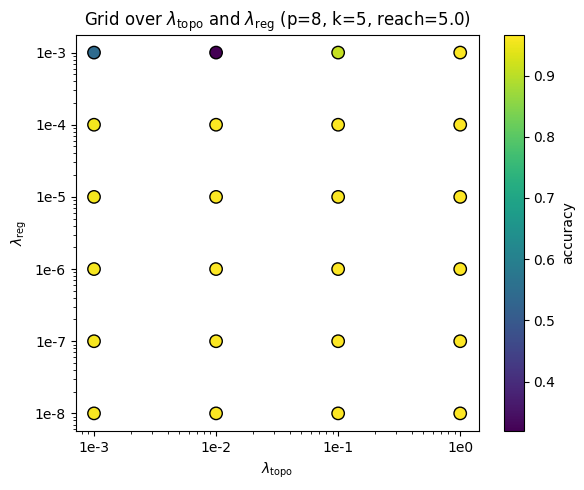

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

def plot_lambda_grid(df, metric_name="accuracy", title=None):
    """
    Scatter plot of lambda_topo vs lambda_reg with color = metric.
    x/y ticks are shown in 1eXX style (e.g. 1e-3, 1e-4).
    """
    x = df["lambda_topo"].values
    y = df["lambda_reg"].values
    m = df[metric_name].values

    fig, ax = plt.subplots(figsize=(6, 5))

    sc = ax.scatter(
        x, y,
        c=m,
        s=80,
        cmap="viridis",
        edgecolors="k"
    )

    ax.set_xscale("log")
    ax.set_yscale("log")

    ax.set_xlabel(r"$\lambda_{\mathrm{topo}}$")
    ax.set_ylabel(r"$\lambda_{\mathrm{reg}}$")

    # Use unique lambda values as ticks
    xticks = sorted(np.unique(x))
    yticks = sorted(np.unique(y))
    ax.set_xticks(xticks)
    ax.set_yticks(yticks)

    # Formatter: 1e-3, 1e-4, ...
    def exp_notation(val, pos):
        if val == 0:
            return "0"
        exp = int(np.round(np.log10(val)))
        return f"1e{exp}"

    ax.xaxis.set_major_formatter(FuncFormatter(exp_notation))
    ax.yaxis.set_major_formatter(FuncFormatter(exp_notation))

    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label(metric_name)

    if title is None:
        unique_p = df["p"].unique()
        unique_k = df["k"].unique()
        unique_reach = df["reach"].unique()
        title = r"Grid over $\lambda_{\mathrm{topo}}$ and $\lambda_{\mathrm{reg}}$"
        if len(unique_p) == 1 and len(unique_k) == 1 and len(unique_reach) == 1:
            title += f" (p={unique_p[0]}, k={unique_k[0]}, reach={unique_reach[0]})"

    ax.set_title(title)
    plt.tight_layout()
    plt.show()
results = load_grid_results("alignment_tuning_results.pkl")
df = extract_lambda_grid_df(results, p=8, k=5, reach=5.0, metric_name="accuracy")
plot_lambda_grid(df, metric_name="accuracy")


In [ ]:
# Example usage:
full_df, rank_by_acc, rank_by_loss, rank_by_foscttm = summarize_results(results)

print("=== Ranked by accuracy (desc) ===")
print(rank_by_acc)

print("\n=== Ranked by final loss (asc) ===")
print(rank_by_loss)

print("\n=== Ranked by FOSCTTM (asc) ===")
print(rank_by_foscttm)

=== Ranked by accuracy (desc) ===
    p  k   lambda_topo    lambda_reg  reach  final_loss  accuracy  \
0   8  5  1.000000e-01  1.000000e-07    5.0    0.003150    0.9974   
1   8  5  1.000000e-01  1.000000e-05    1.0    0.009318    0.9970   
2   8  5  1.000000e-01  1.000000e-05    5.0    0.009353    0.9968   
3   8  5  1.000000e-01  1.000000e-07    1.0    0.000963    0.9968   
4   8  5  1.000000e-03  1.000000e-07    0.1    0.000291    0.9960   
5   8  5  1.000000e-01  1.000000e-05    0.1    0.006542    0.9958   
6   8  5  1.000000e-03  1.000000e-05    0.1    0.003443    0.9936   
7   8  5  1.000000e-01  1.000000e-07    0.1    0.003630    0.9882   
8   8  5  1.000000e-07  1.000000e-05    0.1    0.000002    0.8018   
9   8  5  1.000000e-07  1.000000e-05    1.0    0.000002    0.7136   
10  8  5  1.000000e-03  1.000000e-07    5.0    0.002004    0.6984   
11  8  5  1.000000e-07  1.000000e-05    5.0    0.000002    0.6762   
12  8  5  1.000000e-07  1.000000e-07    5.0    0.000055    0.5602   


In [42]:
import numpy as np
import matplotlib.pyplot as plt

def plot_param_box_pretty(
    df,
    param_col,
    metric_name="accuracy",
    k_filter=None,
    ylim=(0.0, 1.0),
):
    """
    Pretty robustness boxplot:

      - x: discrete values of param_col (e.g. 'p' or 'reach')
      - y: metric_name (e.g. 'accuracy' or 'foscttm')
      - one box per param value
      - no dots / outliers

    Optionally filter to a fixed k (e.g. k=5).
    """
    sub = df.copy()
    if k_filter is not None:
        sub = sub[sub["k"] == k_filter]
    sub = sub[np.isfinite(sub[metric_name])]

    groups = sorted(sub[param_col].unique())
    data = [sub.loc[sub[param_col] == g, metric_name].values for g in groups]

    positions = np.arange(1, len(groups) + 1)

    fig, ax = plt.subplots(figsize=(5.5, 4.0))

    # Boxplot (no outlier dots)
    box = ax.boxplot(
        data,
        positions=positions,
        showfliers=False,
        patch_artist=True,   # so we can color the boxes
        widths=0.6,
    )

    # Color + style boxes
    for patch in box["boxes"]:
        patch.set_facecolor("#a6cee3")   # pale blue
        patch.set_alpha(0.8)
        patch.set_linewidth(0.8)

    for element in ["whiskers", "caps", "medians"]:
        for line in box[element]:
            line.set_linewidth(0.8)

    # X axis labels
    ax.set_xticks(positions)
    ax.set_xticklabels([str(g) for g in groups], fontsize=11)
    ax.set_xlabel(param_col, fontsize=12)
    ax.set_ylabel(metric_name, fontsize=12)
    ax.set_title(f"{metric_name} across {param_col}", fontsize=13)

    if ylim is not None:
        ax.set_ylim(ylim)

    # Light horizontal grid
    ax.set_axisbelow(True)
    ax.yaxis.grid(True, linestyle="--", linewidth=0.6, alpha=0.4)

    # Remove top/right spines
    for spine in ["top", "right"]:
        ax.spines[spine].set_visible(False)

    plt.tight_layout()
    plt.show()

# Robustness over p (aggregate over λ and reach), fixing k=5
plot_param_box_pretty(results, param_col="p", metric_name="accuracy", k_filter=5)

# Robustness over reach
plot_param_box_pretty(results, param_col="reach", metric_name="accuracy", k_filter=5)


KeyError: 'k'

In [43]:
results

{(8,
  5,
  1,
  0.001,
  0.1): {'mapped_X': array([[ 0.44916751, -0.17579775,  0.01710016, ...,  0.07764716,
           0.03773541, -0.01927316],
         [-0.25998782,  0.26051028, -0.24093678, ..., -0.12824009,
           0.04096042, -0.00856509],
         [-0.08622245,  0.48258176, -0.23463979, ..., -0.07417583,
           0.03057318,  0.03486404],
         ...,
         [-0.09815228,  0.34523271, -0.13503189, ...,  0.14684538,
           0.00529904, -0.16545479],
         [-0.3189362 , -0.12868701, -0.00065395, ..., -0.04786453,
           0.03522305,  0.0641283 ],
         [-0.26786635, -0.07687235,  0.01685982, ..., -0.0146406 ,
          -0.02616994, -0.03807175]]), 'mapped_Y': array([[ 0.53409127, -0.10725799, -0.01985043, ...,  0.04375425,
           0.02283597, -0.07434571],
         [-0.42901335, -0.26227161, -0.07959843, ...,  0.04591436,
          -0.0082818 , -0.04910707],
         [ 0.03087475,  0.16930478,  0.02369686, ..., -0.12799068,
          -0.01939926,  0.122478

In [45]:
import numpy as np
import matplotlib.pyplot as plt

def plot_param_violin_pretty(
    df,
    param_col,
    metric_name="accuracy",
    k_filter=None,
    ylim=(0.0, 1.0),
):
    """
    Pretty robustness violin plot:

      - x: distinct values of param_col (e.g. 'p' or 'reach')
      - y: metric_name (e.g. 'accuracy' or 'foscttm')
      - one violin per param value
      - shows mean & min/max, no scatter dots

    If k_filter is not None, only keep rows with that k.
    """
    sub = df.copy()
    if k_filter is not None:
        sub = sub[sub["k"] == k_filter]

    sub = sub[np.isfinite(sub[metric_name])]

    groups = sorted(sub[param_col].unique())
    data = [sub.loc[sub[param_col] == g, metric_name].values for g in groups]

    positions = np.arange(1, len(groups) + 1)

    fig, ax = plt.subplots(figsize=(5.5, 4.0))

    # Violin plot
    parts = ax.violinplot(
        data,
        positions=positions,
        showmeans=True,     # small horizontal line at mean
        showextrema=True,   # min/max
        showmedians=False,  # we don't need both mean & median
        widths=0.7,
    )

    # Style violins
    for body in parts["bodies"]:
        body.set_facecolor("#a6cee3")   # soft blue
        body.set_edgecolor("#1f78b4")   # darker outline
        body.set_alpha(0.8)
        body.set_linewidth(0.8)

    # Style means / extrema
    for line in parts.get("cmeans", []):
        line.set_color("#1f78b4")
        line.set_linewidth(1.2)
    for element in ["cmins", "cmaxes"]:
        if element in parts:
            for line in parts[element]:
                line.set_color("#1f78b4")
                line.set_linewidth(0.8)

    # Axis labels / ticks
    ax.set_xticks(positions)
    ax.set_xticklabels([str(g) for g in groups], fontsize=11)
    ax.set_xlabel(param_col, fontsize=12)
    ax.set_ylabel(metric_name, fontsize=12)
    ax.set_title(f"{metric_name} across {param_col}", fontsize=13)

    if ylim is not None:
        ax.set_ylim(ylim)

    # Light horizontal grid
    ax.set_axisbelow(True)
    ax.yaxis.grid(True, linestyle="--", linewidth=0.6, alpha=0.4)

    # Remove top/right spines
    for spine in ["top", "right"]:
        ax.spines[spine].set_visible(False)

    plt.tight_layout()
    plt.show()


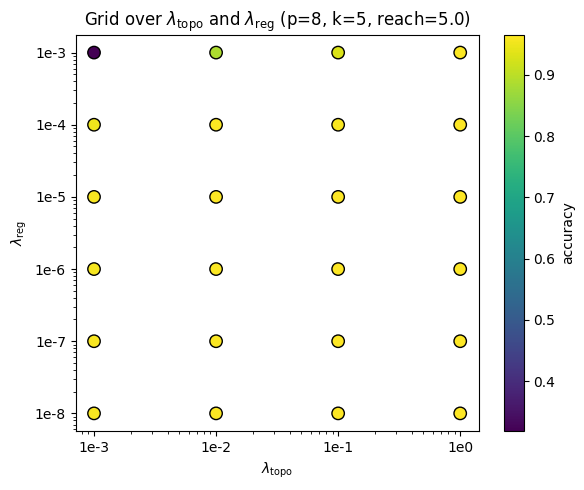

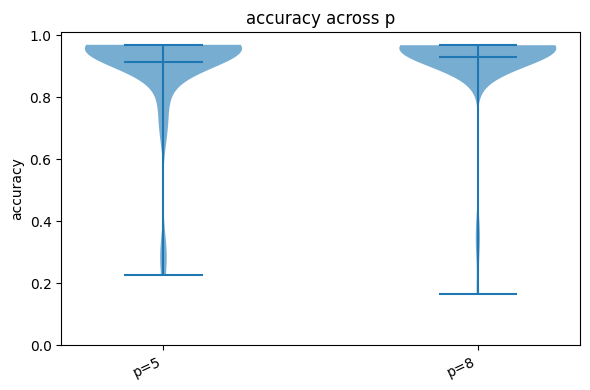

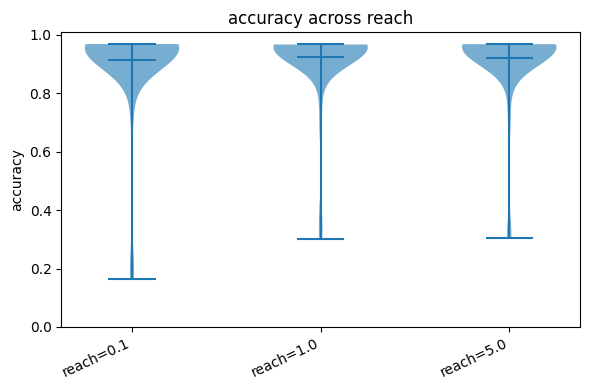

In [50]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter


# ---------------------------------------------------------
# 1) Load results and convert to DataFrame
# ---------------------------------------------------------

def load_grid_results(path="alignment_tuning_results.pkl"):
    """
    Load the dictionary produced by run_alignment_grid.

    Returns
    -------
    results : dict
        keys: (p, k, lambda_topo, lambda_reg, reach)
        values: result dict with key 'metrics' containing 'accuracy', 'foscttm', etc.
    """
    with open(path, "rb") as f:
        results = pickle.load(f)
    return results


def results_to_df(results):
    """
    Convert results dict into a tidy DataFrame with columns:
      p, k, lambda_topo, lambda_reg, reach, accuracy, foscttm, ...
    """
    rows = []
    for (p, k, lambda_topo, lambda_reg, reach), res in results.items():
        row = {
            "p": p,
            "k": k,
            "lambda_topo": lambda_topo,
            "lambda_reg": lambda_reg,
            "reach": reach,
        }
        metrics = res.get("metrics", {})
        for name, val in metrics.items():
            if isinstance(val, (list, tuple, np.ndarray)):
                row[name] = float(np.mean(val))
            else:
                row[name] = float(val)
        rows.append(row)
    return pd.DataFrame(rows)


# ---------------------------------------------------------
# 2) λ_topo vs λ_reg grid (2D scatter, 1eXX ticks)
# ---------------------------------------------------------

def extract_lambda_grid_df(df, p=None, k=None, reach=None, metric_name="accuracy"):
    sub = df.copy()
    if p is not None:
        sub = sub[sub["p"] == p]
    if k is not None:
        sub = sub[sub["k"] == k]
    if reach is not None:
        sub = sub[sub["reach"] == reach]

    sub = sub[np.isfinite(sub[metric_name])]
    if sub.empty:
        raise ValueError("No matching configurations for given (p, k, reach).")
    return sub


def plot_lambda_grid(df_slice, metric_name="accuracy", title=None):
    x = df_slice["lambda_topo"].values
    y = df_slice["lambda_reg"].values
    m = df_slice[metric_name].values

    fig, ax = plt.subplots(figsize=(6, 5))
    sc = ax.scatter(x, y, c=m, s=80, cmap="viridis", edgecolors="k")

    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_xlabel(r"$\lambda_{\mathrm{topo}}$")
    ax.set_ylabel(r"$\lambda_{\mathrm{reg}}$")

    xticks = sorted(np.unique(x))
    yticks = sorted(np.unique(y))
    ax.set_xticks(xticks)
    ax.set_yticks(yticks)

    def exp_notation(val, pos):
        if val <= 0 or not np.isfinite(val):
            return ""
        exp = int(np.round(np.log10(val)))
        return f"1e{exp}"

    ax.xaxis.set_major_formatter(FuncFormatter(exp_notation))
    ax.yaxis.set_major_formatter(FuncFormatter(exp_notation))

    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label(metric_name)

    if title is None:
        up = df_slice["p"].unique()
        uk = df_slice["k"].unique()
        ur = df_slice["reach"].unique()
        title = r"Grid over $\lambda_{\mathrm{topo}}$ and $\lambda_{\mathrm{reg}}$"
        if len(up) == 1 and len(uk) == 1 and len(ur) == 1:
            title += f" (p={up[0]}, k={uk[0]}, reach={ur[0]})"
    ax.set_title(title)

    plt.tight_layout()
    plt.show()


# ---------------------------------------------------------
# 3) Violin plots for robustness over p and reach
# ---------------------------------------------------------

def plot_violin_by_param(df, param_col, metric_name="accuracy", k_filter=None):
    """
    Make a violin plot similar in style to the example figure:
      - x: discrete values of param_col (e.g. p or reach)
      - y: metric_name (e.g. accuracy or foscttm)
      - one violin per parameter value, with mean/extrema lines.
    """
    sub = df.copy()
    if k_filter is not None:
        sub = sub[sub["k"] == k_filter]
    sub = sub[np.isfinite(sub[metric_name])]

    groups = sorted(sub[param_col].unique())
    data = [sub.loc[sub[param_col] == g, metric_name].values for g in groups]

    positions = np.arange(1, len(groups) + 1)  # positions for violins (1..N)

    fig, ax = plt.subplots(figsize=(6, 4))

    parts = ax.violinplot(
        data,
        positions=positions,
        showmeans=True,
        showextrema=True,
        showmedians=False
    )

    # Optional: make violins slightly transparent (not strictly necessary)
    for body in parts['bodies']:
        body.set_alpha(0.6)

    # Labeling
    ax.set_xticks(positions)
    xticklabels = [f"{param_col}={g}" for g in groups]
    ax.set_xticklabels(xticklabels, rotation=25, ha="right")
    ax.set_ylabel(metric_name)
    ax.set_title(f"{metric_name} across {param_col}")

    ax.set_ylim(bottom=0.0)  # if metric is in [0,1], keeps it tidy

    plt.tight_layout()
    plt.show()


# ---------------------------------------------------------
# 4) Example: generate all three robustness plots
# ---------------------------------------------------------

if __name__ == "__main__":
    # 1) Load and build DataFrame
    results = load_grid_results("alignment_tuning_results.pkl")
    df_all = results_to_df(results)

    # 2) λ_topo vs λ_reg grid for a fixed (p, k, reach)
    p_fixed = 8
    k_fixed = 5
    reach_fixed = 5.0

    df_slice = extract_lambda_grid_df(
        df_all,
        p=p_fixed,
        k=k_fixed,
        reach=reach_fixed,
        metric_name="accuracy"   # or "foscttm"
    )
    plot_lambda_grid(df_slice, metric_name="accuracy")

    # 3) Violin: robustness over p (aggregate over λ and reach)
    plot_violin_by_param(df_all, param_col="p", metric_name="accuracy", k_filter=5)

    # 4) Violin: robustness over reach (aggregate over λ and p)
    plot_violin_by_param(df_all, param_col="reach", metric_name="accuracy", k_filter=5)


In [ ]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter


# ---------------------------------------------------------
# 1) Load results and convert to DataFrame
# ---------------------------------------------------------

def load_grid_results(path="alignment_tuning_results.pkl"):
    """
    Load the dictionary produced by run_alignment_grid.

    Returns
    -------
    results : dict
        keys: (p, k, lambda_topo, lambda_reg, reach)
        values: result dict with key 'metrics' containing 'accuracy', 'foscttm', etc.
    """
    with open(path, "rb") as f:
        results = pickle.load(f)
    return results


def results_to_df(results):
    """
    Convert results dict into a tidy DataFrame with columns:
      p, k, lambda_topo, lambda_reg, reach, accuracy, foscttm, ...
    """
    rows = []
    for (p, k, lambda_topo, lambda_reg, reach), res in results.items():
        row = {
            "p": p,
            "k": k,
            "lambda_topo": lambda_topo,
            "lambda_reg": lambda_reg,
            "reach": reach,
        }
        metrics = res.get("metrics", {})
        for name, val in metrics.items():
            if isinstance(val, (list, tuple, np.ndarray)):
                row[name] = float(np.mean(val))
            else:
                row[name] = float(val)
        rows.append(row)
    return pd.DataFrame(rows)


# ---------------------------------------------------------
# 2) λ_topo vs λ_reg grid (2D scatter, 1eXX ticks)
# ---------------------------------------------------------

def extract_lambda_grid_df(df, p=None, k=None, reach=None, metric_name="accuracy"):
    sub = df.copy()
    if p is not None:
        sub = sub[sub["p"] == p]
    if k is not None:
        sub = sub[sub["k"] == k]
    if reach is not None:
        sub = sub[sub["reach"] == reach]

    sub = sub[np.isfinite(sub[metric_name])]
    if sub.empty:
        raise ValueError("No matching configurations for given (p, k, reach).")
    return sub


def plot_lambda_grid(df_slice, metric_name="accuracy", title=None, out_file="lambda_grid.pdf"):
    x = df_slice["lambda_topo"].values
    y = df_slice["lambda_reg"].values
    m = df_slice[metric_name].values

    fig, ax = plt.subplots(figsize=(6, 5))
    sc = ax.scatter(x, y, c=m, s=80, cmap="viridis", edgecolors="k")

    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_xlabel(r"$\lambda_{\mathrm{topo}}$")
    ax.set_ylabel(r"$\lambda_{\mathrm{reg}}$")

    xticks = sorted(np.unique(x))
    yticks = sorted(np.unique(y))
    ax.set_xticks(xticks)
    ax.set_yticks(yticks)

    def exp_notation(val, pos):
        if val <= 0 or not np.isfinite(val):
            return ""
        exp = int(np.round(np.log10(val)))
        return f"1e{exp}"

    ax.xaxis.set_major_formatter(FuncFormatter(exp_notation))
    ax.yaxis.set_major_formatter(FuncFormatter(exp_notation))

    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label(metric_name)

    if title is None:
        up = df_slice["p"].unique()
        uk = df_slice["k"].unique()
        ur = df_slice["reach"].unique()
        title = r"Grid over $\lambda_{\mathrm{topo}}$ and $\lambda_{\mathrm{reg}}$"
        if len(up) == 1 and len(uk) == 1 and len(ur) == 1:
            title += f" (p={up[0]}, k={uk[0]}, reach={ur[0]})"
    ax.set_title(title)

    plt.tight_layout()
    plt.savefig(out_file, bbox_inches="tight")
    plt.close(fig)


# ---------------------------------------------------------
# 3) Violin plots for robustness over p and reach
# ---------------------------------------------------------

def plot_violin_by_param(
    df,
    param_col,
    metric_name="accuracy",
    k_filter=None,
    out_file="violin.pdf"
):
    """
    Violin plot:
      - x: discrete values of param_col (e.g. p or reach)
      - y: metric_name (e.g. accuracy or foscttm)
      - one violin per parameter value, with mean/extrema lines.
    """
    sub = df.copy()
    if k_filter is not None:
        sub = sub[sub["k"] == k_filter]
    sub = sub[np.isfinite(sub[metric_name])]

    groups = sorted(sub[param_col].unique())
    if len(groups) == 0:
        raise ValueError(f"No valid rows for param {param_col} after filtering.")

    data = [sub.loc[sub[param_col] == g, metric_name].values for g in groups]
    positions = np.arange(1, len(groups) + 1)  # positions for violins (1..N)

    fig, ax = plt.subplots(figsize=(6, 4))

    parts = ax.violinplot(
        data,
        positions=positions,
        showmeans=True,
        showextrema=True,
        showmedians=False
    )

    for body in parts['bodies']:
        body.set_alpha(0.6)

    # Labeling
    ax.set_xticks(positions)
    # Shorter tick labels: "0.1", "1.0", etc.
    xticklabels = [str(g) for g in groups]
    ax.set_xticklabels(xticklabels, rotation=25, ha="right")

    ax.set_ylabel(metric_name)
    ax.set_xlabel(param_col)
    ax.set_title(f"{metric_name} across {param_col}")

    ax.set_ylim(0.0, 1.0)  # accuracy/FOSCTTM in [0,1]

    plt.tight_layout()
    plt.savefig(out_file, bbox_inches="tight")
    plt.close(fig)


# ---------------------------------------------------------
# 4) Example: generate all robustness plots and save as PDF
# ---------------------------------------------------------

if __name__ == "__main__":
    # 1) Load and build DataFrame
    results = load_grid_results("alignment_tuning_results.pkl")
    df_all = results_to_df(results)

    # 2) λ_topo vs λ_reg grid for a fixed (p, k, reach)
    p_fixed = 8
    k_fixed = 5
    reach_fixed = 5.0

    df_slice = extract_lambda_grid_df(
        df_all,
        p=p_fixed,
        k=k_fixed,
        reach=reach_fixed,
        metric_name="accuracy"   # or "foscttm"
    )
    plot_lambda_grid(
        df_slice,
        metric_name="accuracy",
        out_file="lambda_grid_accuracy.pdf"
    )

    # 3) Violin: robustness over p (aggregate over λ and reach)
    plot_violin_by_param(
        df_all,
        param_col="p",
        metric_name="accuracy",
        k_filter=5,
        out_file="violin_p_accuracy.pdf"
    )

    # 4) Violin: robustness over reach (aggregate over λ and p)
    plot_violin_by_param(
        df_all,
        param_col="reach",
        metric_name="accuracy",
        k_filter=5,
        out_file="violin_reach_accuracy.pdf"
    )


In [ ]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter


# ---------------------------------------------------------
# 1) Load results and convert to DataFrame
# ---------------------------------------------------------

def load_grid_results(path="alignment_tuning_results.pkl"):
    """
    Load the dictionary produced by run_alignment_grid.

    Returns
    -------
    results : dict
        keys: (p, k, lambda_topo, lambda_reg, reach)
        values: result dict with key 'metrics' containing 'accuracy', 'foscttm', etc.
    """
    with open(path, "rb") as f:
        results = pickle.load(f)
    return results


def results_to_df(results):
    """
    Convert results dict into a tidy DataFrame with columns:
      p, k, lambda_topo, lambda_reg, reach, accuracy, foscttm, ...
    """
    rows = []
    for (p, k, lambda_topo, lambda_reg, reach), res in results.items():
        row = {
            "p": p,
            "k": k,
            "lambda_topo": lambda_topo,
            "lambda_reg": lambda_reg,
            "reach": reach,
        }
        metrics = res.get("metrics", {})
        for name, val in metrics.items():
            if isinstance(val, (list, tuple, np.ndarray)):
                row[name] = float(np.mean(val))
            else:
                row[name] = float(val)
        rows.append(row)
    return pd.DataFrame(rows)


# ---------------------------------------------------------
# 2) λ_topo vs λ_reg grid (2D scatter, 1eXX ticks)
# ---------------------------------------------------------

def extract_lambda_grid_df(df, p=None, k=None, reach=None, metric_name="accuracy"):
    sub = df.copy()
    if p is not None:
        sub = sub[sub["p"] == p]
    if k is not None:
        sub = sub[sub["k"] == k]
    if reach is not None:
        sub = sub[sub["reach"] == reach]

    sub = sub[np.isfinite(sub[metric_name])]
    if sub.empty:
        raise ValueError("No matching configurations for given (p, k, reach).")
    return sub


def plot_lambda_grid(df_slice, metric_name="accuracy", title=None, out_file="lambda_grid.pdf"):
    x = df_slice["lambda_topo"].values
    y = df_slice["lambda_reg"].values
    m = df_slice[metric_name].values

    fig, ax = plt.subplots(figsize=(6, 5))
    sc = ax.scatter(x, y, c=m, s=80, cmap="viridis", edgecolors="k")

    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_xlabel(r"$\lambda_{\mathrm{topo}}$")
    ax.set_ylabel(r"$\lambda_{\mathrm{reg}}$")

    xticks = sorted(np.unique(x))
    yticks = sorted(np.unique(y))
    ax.set_xticks(xticks)
    ax.set_yticks(yticks)

    def exp_notation(val, pos):
        if val <= 0 or not np.isfinite(val):
            return ""
        exp = int(np.round(np.log10(val)))
        return f"1e{exp}"

    ax.xaxis.set_major_formatter(FuncFormatter(exp_notation))
    ax.yaxis.set_major_formatter(FuncFormatter(exp_notation))

    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label(metric_name)

    if title is None:
        up = df_slice["p"].unique()
        uk = df_slice["k"].unique()
        ur = df_slice["reach"].unique()
        title = r"Grid over $\lambda_{\mathrm{topo}}$ and $\lambda_{\mathrm{reg}}$"
        if len(up) == 1 and len(uk) == 1 and len(ur) == 1:
            title += f" (p={up[0]}, k={uk[0]}, reach={ur[0]})"
    ax.set_title(title)

    plt.tight_layout()
    plt.savefig(out_file, bbox_inches="tight")
    plt.close(fig)


# ---------------------------------------------------------
# 3) Violin plots for robustness over p and reach
# ---------------------------------------------------------

def plot_violin_by_param(
    df,
    param_col,
    metric_name="accuracy",
    k_filter=None,
    out_file="violin.pdf"
):
    """
    Violin plot:
      - x: discrete values of param_col (e.g. p or reach)
      - y: metric_name (e.g. accuracy or foscttm)
      - one violin per parameter value, with mean/extrema lines.
    """
    sub = df.copy()
    if k_filter is not None:
        sub = sub[sub["k"] == k_filter]
    sub = sub[np.isfinite(sub[metric_name])]

    groups = sorted(sub[param_col].unique())
    if len(groups) == 0:
        raise ValueError(f"No valid rows for param {param_col} after filtering.")

    data = [sub.loc[sub[param_col] == g, metric_name].values for g in groups]
    positions = np.arange(1, len(groups) + 1)  # positions for violins (1..N)

    fig, ax = plt.subplots(figsize=(6, 4))

    parts = ax.violinplot(
        data,
        positions=positions,
        showmeans=True,
        showextrema=True,
        showmedians=False
    )

    for body in parts['bodies']:
        body.set_alpha(0.6)

    # Labeling
    ax.set_xticks(positions)
    # Shorter tick labels: "0.1", "1.0", etc.
    xticklabels = [str(g) for g in groups]
    ax.set_xticklabels(xticklabels, rotation=25, ha="right")

    ax.set_ylabel(metric_name)
    ax.set_xlabel(param_col)
    ax.set_title(f"{metric_name} across {param_col}")

    ax.set_ylim(0.0, 1.0)  # accuracy/FOSCTTM in [0,1]

    plt.tight_layout()
    plt.savefig(out_file, bbox_inches="tight")
    plt.close(fig)


# ---------------------------------------------------------
# 4) Example: generate all robustness plots and save as PDF
# ---------------------------------------------------------

if __name__ == "__main__":
    # 1) Load and build DataFrame
    results = load_grid_results("alignment_tuning_results.pkl")
    df_all = results_to_df(results)

    # 2) λ_topo vs λ_reg grid for a fixed (p, k, reach)
    p_fixed = 8
    k_fixed = 5
    reach_fixed = 5.0

    df_slice = extract_lambda_grid_df(
        df_all,
        p=p_fixed,
        k=k_fixed,
        reach=reach_fixed,
        metric_name="accuracy"   # or "foscttm"
    )
    plot_lambda_grid(
        df_slice,
        metric_name="accuracy",
        out_file="lambda_grid_accuracy.pdf"
    )

    # 3) Violin: robustness over p (aggregate over λ and reach)
    plot_violin_by_param(
        df_all,
        param_col="p",
        metric_name="accuracy",
        k_filter=5,
        out_file="violin_p_accuracy.pdf"
    )

    # 4) Violin: robustness over reach (aggregate over λ and p)
    plot_violin_by_param(
        df_all,
        param_col="reach",
        metric_name="accuracy",
        k_filter=5,
        out_file="violin_reach_accuracy.pdf"
    )


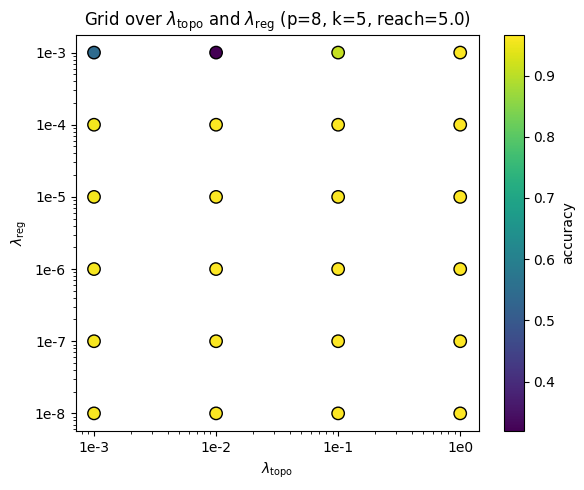

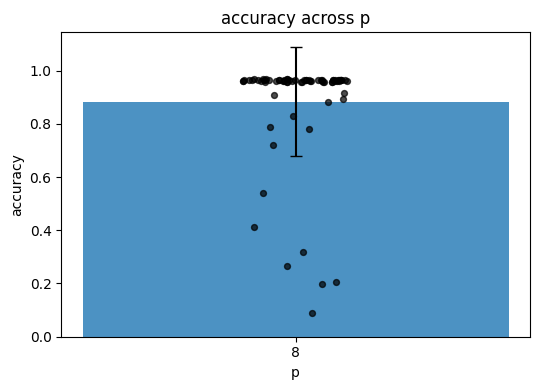

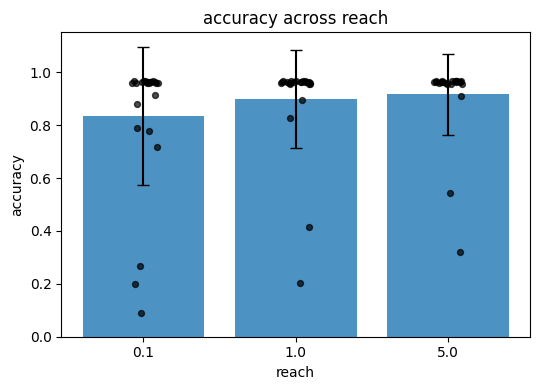

In [48]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter


# ---------------------------------------------------------
# 1) Load results and convert to DataFrame
# ---------------------------------------------------------

def load_grid_results(path="alignment_tuning_results.pkl"):
    """
    Load the dictionary produced by run_alignment_grid.

    Returns
    -------
    results : dict
        keys: (p, k, lambda_topo, lambda_reg, reach)
        values: result dict with key 'metrics' containing 'accuracy', 'foscttm', etc.
    """
    with open(path, "rb") as f:
        results = pickle.load(f)
    return results


def results_to_df(results):
    """
    Convert results dict into a tidy DataFrame with columns:
      p, k, lambda_topo, lambda_reg, reach, accuracy, foscttm, ...
    """
    rows = []
    for (p, k, lambda_topo, lambda_reg, reach), res in results.items():
        row = {
            "p": p,
            "k": k,
            "lambda_topo": lambda_topo,
            "lambda_reg": lambda_reg,
            "reach": reach,
        }
        metrics = res.get("metrics", {})
        for name, val in metrics.items():
            if isinstance(val, (list, tuple, np.ndarray)):
                row[name] = float(np.mean(val))
            else:
                row[name] = float(val)
        rows.append(row)
    return pd.DataFrame(rows)


# ---------------------------------------------------------
# 2) λ_topo vs λ_reg grid (2D scatter, 1eXX ticks)
# ---------------------------------------------------------

def extract_lambda_grid_df(df, p=None, k=None, reach=None, metric_name="accuracy"):
    sub = df.copy()
    if p is not None:
        sub = sub[sub["p"] == p]
    if k is not None:
        sub = sub[sub["k"] == k]
    if reach is not None:
        sub = sub[sub["reach"] == reach]

    sub = sub[np.isfinite(sub[metric_name])]
    if sub.empty:
        raise ValueError("No matching configurations for given (p, k, reach).")
    return sub


def plot_lambda_grid(df_slice, metric_name="accuracy", title=None):
    x = df_slice["lambda_topo"].values
    y = df_slice["lambda_reg"].values
    m = df_slice[metric_name].values

    fig, ax = plt.subplots(figsize=(6, 5))
    sc = ax.scatter(x, y, c=m, s=80, cmap="viridis", edgecolors="k")

    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_xlabel(r"$\lambda_{\mathrm{topo}}$")
    ax.set_ylabel(r"$\lambda_{\mathrm{reg}}$")

    xticks = sorted(np.unique(x))
    yticks = sorted(np.unique(y))
    ax.set_xticks(xticks)
    ax.set_yticks(yticks)

    def exp_notation(val, pos):
        if val <= 0 or not np.isfinite(val):
            return ""
        exp = int(np.round(np.log10(val)))
        return f"1e{exp}"

    ax.xaxis.set_major_formatter(FuncFormatter(exp_notation))
    ax.yaxis.set_major_formatter(FuncFormatter(exp_notation))

    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label(metric_name)

    if title is None:
        up = df_slice["p"].unique()
        uk = df_slice["k"].unique()
        ur = df_slice["reach"].unique()
        title = r"Grid over $\lambda_{\mathrm{topo}}$ and $\lambda_{\mathrm{reg}}$"
        if len(up) == 1 and len(uk) == 1 and len(ur) == 1:
            title += f" (p={up[0]}, k={uk[0]}, reach={ur[0]})"
    ax.set_title(title)

    plt.tight_layout()
    plt.show()


# ---------------------------------------------------------
# 3) Bar + error + jitter for p and reach
# ---------------------------------------------------------

def plot_param_bar_with_jitter(df, param_col, metric_name="accuracy", k_filter=None):
    """
    Bar chart robustness plot:
      - x: discrete values of param_col (e.g. p or reach)
      - y: mean of metric_name
      - error bars: std of metric_name
      - jittered points: all individual runs for that setting

    Optionally filter to a fixed k (e.g. k=5).
    """
    sub = df.copy()
    if k_filter is not None:
        sub = sub[sub["k"] == k_filter]
    sub = sub[np.isfinite(sub[metric_name])]

    groups = sorted(sub[param_col].unique())
    stats = (
        sub.groupby(param_col)[metric_name]
        .agg(["mean", "std"])
        .reset_index()
        .sort_values(param_col)
    )

    # For jittered points, collect list of arrays per group
    values_per_group = [
        sub.loc[sub[param_col] == g, metric_name].values for g in groups
    ]

    fig, ax = plt.subplots(figsize=(5.5, 4))

    x = np.arange(len(groups))
    means = stats["mean"].values
    stds = stats["std"].values

    # Bars with error bars
    ax.bar(x, means, yerr=stds, capsize=4, alpha=0.8)

    # Add jittered individual points
    for xi, vals in zip(x, values_per_group):
        jitter = (np.random.rand(len(vals)) - 0.5) * 0.2  # width of jitter
        ax.scatter(
            np.full_like(vals, xi, dtype=float) + jitter,
            vals,
            s=18,
            alpha=0.7,
            color="black"
        )

    # Labels
    ax.set_xticks(x)
    ax.set_xticklabels([str(g) for g in groups])
    ax.set_xlabel(param_col)
    ax.set_ylabel(metric_name)
    ax.set_title(f"{metric_name} across {param_col}")

    ax.set_ylim(bottom=0.0)  # assuming metric in [0,1]

    plt.tight_layout()
    plt.show()


# ---------------------------------------------------------
# 4) Example: generate all three plots
# ---------------------------------------------------------

if __name__ == "__main__":
    # 1) Load and build DataFrame
    results = load_grid_results("alignment_tuning_results.pkl")
    df_all = results_to_df(results)

    # 2) λ_topo vs λ_reg grid for a fixed (p, k, reach)
    p_fixed = 8
    k_fixed = 5
    reach_fixed = 5.0

    df_slice = extract_lambda_grid_df(
        df_all,
        p=p_fixed,
        k=k_fixed,
        reach=reach_fixed,
        metric_name="accuracy"   # or "foscttm"
    )
    plot_lambda_grid(df_slice, metric_name="accuracy")

    # 3) Bar+jitter: robustness over p (aggregate over λ and reach)
    plot_param_bar_with_jitter(df_all, param_col="p", metric_name="accuracy", k_filter=5)

    # 4) Bar+jitter: robustness over reach (aggregate over λ and p)
    plot_param_bar_with_jitter(df_all, param_col="reach", metric_name="accuracy", k_filter=5)


In [ ]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter


# ---------------------------------------------------------
# 1) Load results and convert to DataFrame
# ---------------------------------------------------------

def load_grid_results(path="alignment_tuning_results.pkl"):
    """
    Load the dictionary produced by run_alignment_grid.

    Returns
    -------
    results : dict
        keys: (p, k, lambda_topo, lambda_reg, reach)
        values: result dict with key 'metrics' containing 'accuracy', 'foscttm', etc.
    """
    with open(path, "rb") as f:
        results = pickle.load(f)
    return results


def results_to_df(results):
    """
    Convert results dict into a tidy DataFrame with columns:
      p, k, lambda_topo, lambda_reg, reach, accuracy, foscttm, ...
    """
    rows = []
    for (p, k, lambda_topo, lambda_reg, reach), res in results.items():
        row = {
            "p": p,
            "k": k,
            "lambda_topo": lambda_topo,
            "lambda_reg": lambda_reg,
            "reach": reach,
        }
        metrics = res.get("metrics", {})
        for name, val in metrics.items():
            if isinstance(val, (list, tuple, np.ndarray)):
                row[name] = float(np.mean(val))
            else:
                row[name] = float(val)
        rows.append(row)
    return pd.DataFrame(rows)


# ---------------------------------------------------------
# 2) λ_topo vs λ_reg grid (2D scatter, 1eXX ticks)
# ---------------------------------------------------------

def extract_lambda_grid_df(df, p=None, k=None, reach=None, metric_name="accuracy"):
    sub = df.copy()
    if p is not None:
        sub = sub[sub["p"] == p]
    if k is not None:
        sub = sub[sub["k"] == k]
    if reach is not None:
        sub = sub[sub["reach"] == reach]

    sub = sub[np.isfinite(sub[metric_name])]
    if sub.empty:
        raise ValueError("No matching configurations for given (p, k, reach).")
    return sub


def plot_lambda_grid(df_slice, metric_name="accuracy",
                     title=None, out_file="lambda_grid_accuracy.pdf"):
    """
    Plot Label Transfer Accuracy (LTA) over the (lambda_topo, lambda_reg) grid.
    """
    x = df_slice["lambda_topo"].values
    y = df_slice["lambda_reg"].values
    m = df_slice[metric_name].values  # column name is 'accuracy'

    fig, ax = plt.subplots(figsize=(6, 5))
    sc = ax.scatter(x, y, c=m, s=80, cmap="viridis", edgecolors="k")

    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_xlabel(r"$\lambda_{\mathrm{topo}}$")
    ax.set_ylabel(r"$\lambda_{\mathrm{reg}}$")

    xticks = sorted(np.unique(x))
    yticks = sorted(np.unique(y))
    ax.set_xticks(xticks)
    ax.set_yticks(yticks)

    def exp_notation(val, pos):
        if val <= 0 or not np.isfinite(val):
            return ""
        exp = int(np.round(np.log10(val)))
        return f"1e{exp}"

    ax.xaxis.set_major_formatter(FuncFormatter(exp_notation))
    ax.yaxis.set_major_formatter(FuncFormatter(exp_notation))

    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label("Label Transfer Accuracy (LTA)")

    if title is None:
        up = df_slice["p"].unique()
        uk = df_slice["k"].unique()
        ur = df_slice["reach"].unique()
        title = r"Label Transfer Accuracy (LTA) over $\lambda_{\mathrm{topo}}$ and $\lambda_{\mathrm{reg}}$"
        if len(up) == 1 and len(uk) == 1 and len(ur) == 1:
            title += f" (p={up[0]}, k={uk[0]}, reach={ur[0]})"
    ax.set_title(title)

    plt.tight_layout()
    plt.savefig(out_file, bbox_inches="tight")
    plt.close(fig)


# ---------------------------------------------------------
# 3) Violin plots for robustness over p and reach
# ---------------------------------------------------------

def plot_violin_by_param(
    df,
    param_col,
    metric_name="accuracy",
    k_filter=None,
    out_file="violin.pdf"
):
    """
    Violin plot of Label Transfer Accuracy (LTA):
      - x: discrete values of param_col (e.g. p or reach)
      - y: LTA (stored in df[metric_name])
      - one violin per parameter value, with mean/extrema lines.
    """
    sub = df.copy()
    if k_filter is not None:
        sub = sub[sub["k"] == k_filter]
    sub = sub[np.isfinite(sub[metric_name])]

    groups = sorted(sub[param_col].unique())
    if len(groups) == 0:
        raise ValueError(f"No valid rows for param {param_col} after filtering.")

    data = [sub.loc[sub[param_col] == g, metric_name].values for g in groups]
    positions = np.arange(1, len(groups) + 1)  # positions for violins (1..N)

    fig, ax = plt.subplots(figsize=(6, 4))

    parts = ax.violinplot(
        data,
        positions=positions,
        showmeans=True,
        showextrema=True,
        showmedians=False
    )

    for body in parts['bodies']:
        body.set_alpha(0.6)

    # Labeling
    ax.set_xticks(positions)
    xticklabels = [str(g) for g in groups]
    ax.set_xticklabels(xticklabels, rotation=25, ha="right")

    ax.set_ylabel("Label Transfer Accuracy (LTA)")
    ax.set_xlabel(param_col)
    ax.set_title(f"Label Transfer Accuracy (LTA) across {param_col}")

    ax.set_ylim(0.0, 1.0)  # LTA in [0,1]

    plt.tight_layout()
    plt.savefig(out_file, bbox_inches="tight")
    plt.close(fig)


# ---------------------------------------------------------
# 4) Example: generate all robustness plots and save as PDF
# ---------------------------------------------------------

if __name__ == "__main__":
    # 1) Load and build DataFrame
    results = load_grid_results("alignment_tuning_results.pkl")
    df_all = results_to_df(results)

    # 2) λ_topo vs λ_reg grid for a fixed (p, k, reach)
    p_fixed = 8
    k_fixed = 5
    reach_fixed = 5.0

    df_slice = extract_lambda_grid_df(
        df_all,
        p=p_fixed,
        k=k_fixed,
        reach=reach_fixed,
        metric_name="accuracy"   # column name
    )
    plot_lambda_grid(
        df_slice,
        metric_name="accuracy",
        out_file="lambda_grid_accuracy.pdf"
    )

    # 3) Violin: robustness over p (aggregate over λ and reach)
    plot_violin_by_param(
        df_all,
        param_col="p",
        metric_name="accuracy",
        k_filter=5,
        out_file="violin_p_accuracy.pdf"
    )

    # 4) Violin: robustness over reach (aggregate over λ and p)
    plot_violin_by_param(
        df_all,
        param_col="reach",
        metric_name="accuracy",
        k_filter=5,
        out_file="violin_reach_accuracy.pdf"
    )

if __name__ == "__main__":
    # 1) Load and build DataFrame
    results = load_grid_results("alignment_tuning_results.pkl")
    df_all = results_to_df(results)

    # 2) λ_topo vs λ_reg grid for a fixed (p, k, reach)
    p_fixed = 8
    k_fixed = 5
    reach_fixed = 5.0

    df_slice = extract_lambda_grid_df(
        df_all,
        p=p_fixed,
        k=k_fixed,
        reach=reach_fixed,
        metric_name="accuracy"   # or "foscttm"
    )
    plot_lambda_grid(
        df_slice,
        metric_name="accuracy",
        out_file="lambda_grid_accuracy.pdf"
    )

    # 3) Violin: robustness over p (aggregate over λ and reach)
    plot_violin_by_param(
        df_all,
        param_col="p",
        metric_name="accuracy",
        k_filter=5,
        out_file="violin_p_accuracy.pdf"
    )

    # 4) Violin: robustness over reach (aggregate over λ and p)
    plot_violin_by_param(
        df_all,
        param_col="reach",
        metric_name="accuracy",
        k_filter=5,
        out_file="violin_reach_accuracy.pdf"
    )


In [ ]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter


# ---------------------------------------------------------
# 1) Load results and convert to DataFrame
# ---------------------------------------------------------

def load_grid_results(path="alignment_tuning_results.pkl"):
    """
    Load the dictionary produced by run_alignment_grid.

    Returns
    -------
    results : dict
        keys: (p, k, lambda_topo, lambda_reg, reach)
        values: result dict with key 'metrics' containing 'accuracy', 'foscttm', etc.
    """
    with open(path, "rb") as f:
        results = pickle.load(f)
    return results


def results_to_df(results):
    """
    Convert results dict into a tidy DataFrame with columns:
      p, k, lambda_topo, lambda_reg, reach, accuracy, foscttm, ...
    """
    rows = []
    for (p, k, lambda_topo, lambda_reg, reach), res in results.items():
        row = {
            "p": p,
            "k": k,
            "lambda_topo": lambda_topo,
            "lambda_reg": lambda_reg,
            "reach": reach,
        }
        metrics = res.get("metrics", {})
        for name, val in metrics.items():
            if isinstance(val, (list, tuple, np.ndarray)):
                row[name] = float(np.mean(val))
            else:
                row[name] = float(val)
        rows.append(row)
    return pd.DataFrame(rows)


# ---------------------------------------------------------
# 2) λ_topo vs λ_reg grid (2D scatter, 1eXX ticks)
# ---------------------------------------------------------

def extract_lambda_grid_df(df, p=None, k=None, reach=None, metric_name="accuracy"):
    sub = df.copy()
    if p is not None:
        sub = sub[sub["p"] == p]
    if k is not None:
        sub = sub[sub["k"] == k]
    if reach is not None:
        sub = sub[sub["reach"] == reach]

    sub = sub[np.isfinite(sub[metric_name])]
    if sub.empty:
        raise ValueError("No matching configurations for given (p, k, reach).")
    return sub


def plot_lambda_grid(df_slice, metric_name="accuracy",
                     title=None, out_file="lambda_grid_accuracy.pdf"):
    """
    Plot Label Transfer Accuracy (LTA) over the (lambda_topo, lambda_reg) grid.
    """
    x = df_slice["lambda_topo"].values
    y = df_slice["lambda_reg"].values
    m = df_slice[metric_name].values  # column name is 'accuracy'

    fig, ax = plt.subplots(figsize=(6, 5))
    sc = ax.scatter(x, y, c=m, s=80, cmap="viridis", edgecolors="k")

    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_xlabel(r"$\lambda_{\mathrm{topo}}$")
    ax.set_ylabel(r"$\lambda_{\mathrm{reg}}$")

    xticks = sorted(np.unique(x))
    yticks = sorted(np.unique(y))
    ax.set_xticks(xticks)
    ax.set_yticks(yticks)

    def exp_notation(val, pos):
        if val <= 0 or not np.isfinite(val):
            return ""
        exp = int(np.round(np.log10(val)))
        return f"1e{exp}"

    ax.xaxis.set_major_formatter(FuncFormatter(exp_notation))
    ax.yaxis.set_major_formatter(FuncFormatter(exp_notation))

    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label("Label Transfer Accuracy (LTA)")

    if title is None:
        up = df_slice["p"].unique()
        uk = df_slice["k"].unique()
        ur = df_slice["reach"].unique()
        title = r"Label Transfer Accuracy (LTA) over $\lambda_{\mathrm{topo}}$ and $\lambda_{\mathrm{reg}}$"
        if len(up) == 1 and len(uk) == 1 and len(ur) == 1:
            title += f" (p={up[0]}, k={uk[0]}, reach={ur[0]})"
    ax.set_title(title)

    plt.tight_layout()
    plt.savefig(out_file, bbox_inches="tight")
    plt.close(fig)


# ---------------------------------------------------------
# 3) Violin plots for robustness over p and reach
# ---------------------------------------------------------

def plot_violin_by_param(
    df,
    param_col,
    metric_name="accuracy",
    k_filter=None,
    out_file="violin.pdf"
):
    """
    Violin plot of Label Transfer Accuracy (LTA):
      - x: discrete values of param_col (e.g. p or reach)
      - y: LTA (stored in df[metric_name])
      - one violin per parameter value, with mean/extrema lines.
    """
    sub = df.copy()
    if k_filter is not None:
        sub = sub[sub["k"] == k_filter]
    sub = sub[np.isfinite(sub[metric_name])]

    groups = sorted(sub[param_col].unique())
    if len(groups) == 0:
        raise ValueError(f"No valid rows for param {param_col} after filtering.")

    data = [sub.loc[sub[param_col] == g, metric_name].values for g in groups]
    positions = np.arange(1, len(groups) + 1)  # positions for violins (1..N)

    fig, ax = plt.subplots(figsize=(6, 4))

    parts = ax.violinplot(
        data,
        positions=positions,
        showmeans=True,
        showextrema=True,
        showmedians=False
    )

    for body in parts['bodies']:
        body.set_alpha(0.6)

    # Labeling
    ax.set_xticks(positions)
    xticklabels = [str(g) for g in groups]
    ax.set_xticklabels(xticklabels, rotation=25, ha="right")

    ax.set_ylabel("Label Transfer Accuracy (LTA)")
    ax.set_xlabel(param_col)
    ax.set_title(f"Label Transfer Accuracy (LTA) across {param_col}")

    ax.set_ylim(0.0, 1.0)  # LTA in [0,1]

    plt.tight_layout()
    plt.savefig(out_file, bbox_inches="tight")
    plt.close(fig)


# ---------------------------------------------------------
# 4) Example: generate all robustness plots and save as PDF
# ---------------------------------------------------------

if __name__ == "__main__":
    # 1) Load and build DataFrame
    results = load_grid_results("alignment_tuning_results.pkl")
    df_all = results_to_df(results)

    # 2) λ_topo vs λ_reg grid for a fixed (p, k, reach)
    p_fixed = 8
    k_fixed = 5
    reach_fixed = 5.0

    df_slice = extract_lambda_grid_df(
        df_all,
        p=p_fixed,
        k=k_fixed,
        reach=reach_fixed,
        metric_name="accuracy"   # column name
    )
    plot_lambda_grid(
        df_slice,
        metric_name="accuracy",
        out_file="lambda_grid_accuracy.pdf"
    )

    # 3) Violin: robustness over p (aggregate over λ and reach)
    plot_violin_by_param(
        df_all,
        param_col="p",
        metric_name="accuracy",
        k_filter=5,
        out_file="violin_p_accuracy.pdf"
    )

    # 4) Violin: robustness over reach (aggregate over λ and p)
    plot_violin_by_param(
        df_all,
        param_col="reach",
        metric_name="accuracy",
        k_filter=5,
        out_file="violin_reach_accuracy.pdf"
    )


In [52]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter


# ---------------------------------------------------------
# 1) Load results and convert to DataFrame
# ---------------------------------------------------------

def load_grid_results(path="alignment_tuning_results.pkl"):
    """
    Load the dictionary produced by run_alignment_grid.

    Returns
    -------
    results : dict
        keys: (p, k, lambda_topo, lambda_reg, reach)
        values: result dict with key 'metrics' containing 'accuracy', 'foscttm', etc.
    """
    with open(path, "rb") as f:
        results = pickle.load(f)
    return results


def results_to_df(results):
    """
    Convert results dict into a tidy DataFrame with columns:
      p, k, lambda_topo, lambda_reg, reach, accuracy, foscttm, ...
    """
    rows = []
    for (p, k, lambda_topo, lambda_reg, reach), res in results.items():
        row = {
            "p": p,
            "k": k,
            "lambda_topo": lambda_topo,
            "lambda_reg": lambda_reg,
            "reach": reach,
        }
        metrics = res.get("metrics", {})
        for name, val in metrics.items():
            if isinstance(val, (list, tuple, np.ndarray)):
                row[name] = float(np.mean(val))
            else:
                row[name] = float(val)
        rows.append(row)
    return pd.DataFrame(rows)


# ---------------------------------------------------------
# 2) λ_topo vs λ_reg grid (2D scatter, 1eXX ticks)
# ---------------------------------------------------------

def extract_lambda_grid_df(df, p=None, k=None, reach=None, metric_name="accuracy"):
    sub = df.copy()
    if p is not None:
        sub = sub[sub["p"] == p]
    if k is not None:
        sub = sub[sub["k"] == k]
    if reach is not None:
        sub = sub[sub["reach"] == reach]

    sub = sub[np.isfinite(sub[metric_name])]
    if sub.empty:
        raise ValueError("No matching configurations for given (p, k, reach).")
    return sub


def plot_lambda_grid(df_slice, metric_name="accuracy",
                     title=None, out_file="lambda_grid_accuracy.pdf"):
    """
    Plot Label Transfer Accuracy (LTA) over the (lambda_topo, lambda_reg) grid.
    """
    x = df_slice["lambda_topo"].values
    y = df_slice["lambda_reg"].values
    m = df_slice[metric_name].values  # column name is 'accuracy'

    fig, ax = plt.subplots(figsize=(6, 5))
    sc = ax.scatter(x, y, c=m, s=80, cmap="viridis", edgecolors="k")

    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_xlabel(r"$\lambda_{\mathrm{topo}}$")
    ax.set_ylabel(r"$\lambda_{\mathrm{reg}}$")

    xticks = sorted(np.unique(x))
    yticks = sorted(np.unique(y))
    ax.set_xticks(xticks)
    ax.set_yticks(yticks)

    def exp_notation(val, pos):
        if val <= 0 or not np.isfinite(val):
            return ""
        exp = int(np.round(np.log10(val)))
        return f"1e{exp}"

    ax.xaxis.set_major_formatter(FuncFormatter(exp_notation))
    ax.yaxis.set_major_formatter(FuncFormatter(exp_notation))

    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label("Label Transfer Accuracy (LTA)")

    if title is None:
        up = df_slice["p"].unique()
        uk = df_slice["k"].unique()
        ur = df_slice["reach"].unique()
        title = r"Label Transfer Accuracy (LTA) over $\lambda_{\mathrm{topo}}$ and $\lambda_{\mathrm{reg}}$"
        if len(up) == 1 and len(uk) == 1 and len(ur) == 1:
            title += f" (p={up[0]}, k={uk[0]}, reach={ur[0]})"
    ax.set_title(title)

    plt.tight_layout()
    plt.savefig(out_file, bbox_inches="tight")
    plt.close(fig)


# ---------------------------------------------------------
# 3) Violin plots for robustness over p and reach
# ---------------------------------------------------------

def plot_violin_by_param(
    df,
    param_col,
    metric_name="accuracy",
    k_filter=None,
    out_file="violin.pdf"
):
    """
    Violin plot of Label Transfer Accuracy (LTA):
      - x: discrete values of param_col (e.g. p or reach)
      - y: LTA (stored in df[metric_name])
      - one violin per parameter value, with mean/extrema lines.
    """
    sub = df.copy()
    if k_filter is not None:
        sub = sub[sub["k"] == k_filter]
    sub = sub[np.isfinite(sub[metric_name])]

    groups = sorted(sub[param_col].unique())
    if len(groups) == 0:
        raise ValueError(f"No valid rows for param {param_col} after filtering.")

    data = [sub.loc[sub[param_col] == g, metric_name].values for g in groups]
    positions = np.arange(1, len(groups) + 1)  # positions for violins (1..N)

    fig, ax = plt.subplots(figsize=(6, 4))

    parts = ax.violinplot(
        data,
        positions=positions,
        showmeans=True,
        showextrema=True,
        showmedians=False
    )

    for body in parts['bodies']:
        body.set_alpha(0.6)

    # Labeling
    ax.set_xticks(positions)
    xticklabels = [str(g) for g in groups]
    ax.set_xticklabels(xticklabels, rotation=25, ha="right")

    ax.set_ylabel("Label Transfer Accuracy (LTA)")
    ax.set_xlabel(param_col)
    ax.set_title(f"Label Transfer Accuracy (LTA) across {param_col}")

    ax.set_ylim(0.0, 1.0)  # LTA in [0,1]

    plt.tight_layout()
    plt.savefig(out_file, bbox_inches="tight")
    plt.close(fig)


# ---------------------------------------------------------
# 4) Example: generate all robustness plots and save as PDF
# ---------------------------------------------------------

if __name__ == "__main__":
    # 1) Load and build DataFrame
    results = load_grid_results("alignment_tuning_results.pkl")
    df_all = results_to_df(results)

    # 2) λ_topo vs λ_reg grid for a fixed (p, k, reach)
    p_fixed = 8
    k_fixed = 5
    reach_fixed = 5.0

    df_slice = extract_lambda_grid_df(
        df_all,
        p=p_fixed,
        k=k_fixed,
        reach=reach_fixed,
        metric_name="accuracy"   # column name
    )
    plot_lambda_grid(
        df_slice,
        metric_name="accuracy",
        out_file="lambda_grid_accuracy.pdf"
    )

    # 3) Violin: robustness over p (aggregate over λ and reach)
    plot_violin_by_param(
        df_all,
        param_col="p",
        metric_name="accuracy",
        k_filter=5,
        out_file="violin_p_accuracy.pdf"
    )

    # 4) Violin: robustness over reach (aggregate over λ and p)
    plot_violin_by_param(
        df_all,
        param_col="reach",
        metric_name="accuracy",
        k_filter=5,
        out_file="violin_reach_accuracy.pdf"
    )

if __name__ == "__main__":
    # 1) Load and build DataFrame
    results = load_grid_results("alignment_tuning_results.pkl")
    df_all = results_to_df(results)

    # 2) λ_topo vs λ_reg grid for a fixed (p, k, reach)
    p_fixed = 8
    k_fixed = 5
    reach_fixed = 5.0

    df_slice = extract_lambda_grid_df(
        df_all,
        p=p_fixed,
        k=k_fixed,
        reach=reach_fixed,
        metric_name="accuracy"   # or "foscttm"
    )
    plot_lambda_grid(
        df_slice,
        metric_name="accuracy",
        out_file="lambda_grid_accuracy.pdf"
    )

    # 3) Violin: robustness over p (aggregate over λ and reach)
    plot_violin_by_param(
        df_all,
        param_col="p",
        metric_name="accuracy",
        k_filter=5,
        out_file="violin_p_accuracy.pdf"
    )

    # 4) Violin: robustness over reach (aggregate over λ and p)
    plot_violin_by_param(
        df_all,
        param_col="reach",
        metric_name="accuracy",
        k_filter=5,
        out_file="violin_reach_accuracy.pdf"
    )
